# AARRR ÏßÄÌëú Ï§ë Acquisition ÌôïÏù∏
---


In [2]:
## 1.ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï†ïÎ¶¨ 
import numpy as np
import pandas as pd
from itertools import groupby
from collections import Counter
from datetime import timedelta

# object ÌòïÏãùÏúºÎ°ú Ï†ÄÏû•Îêú Î≥ÄÏàòÎ•º list ÌòïÏãùÏúºÎ°ú Î∞îÍæ∏Í∏∞ ÏúÑÌï¥ÏÑú
import ast

# GCS ÌååÏùº Í≤ΩÎ°úÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from google.cloud import storage
from google.oauth2 import service_account

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib.dates as mdates

from itertools import groupby
from collections import Counter
import matplotlib.ticker as mtick


In [3]:
# Ïù∏Ï¶ù
key_path = "/home/sungcheol/codeit_project/codeit_project/config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏÉùÏÑ±
client = storage.Client(credentials=credentials)
bucket = client.bucket("my-advanced-data-bucket")

# 'votes/' Í≤ΩÎ°úÏóê ÏûàÎäî .parquet ÌååÏùº Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
vote_blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in vote_blobs if blob.name.endswith(".parquet")]

# Í≤∞Í≥º ÌôïÏù∏
print("Votes files in GCS:")
print(vote_file_list)
print()

# # 'hackle/' Í≤ΩÎ°úÏóê ÏûàÎäî .parquet ÌååÏùº Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
# hackle_blobs = bucket.list_blobs(prefix="hackle/")
# hackle_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in hackle_blobs if blob.name.endswith(".parquet")]

# # Í≤∞Í≥º ÌôïÏù∏
# print("Hackle files in GCS:")
# print(hackle_file_list)


Votes files in GCS:
['gs://my-advanced-data-bucket/votes/accounts_attendance.parquet', 'gs://my-advanced-data-bucket/votes/accounts_blockrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_failpaymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_friendrequest.parquet', 'gs://my-advanced-data-bucket/votes/accounts_group.parquet', 'gs://my-advanced-data-bucket/votes/accounts_nearbyschool.parquet', 'gs://my-advanced-data-bucket/votes/accounts_paymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_pointhistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_school.parquet', 'gs://my-advanced-data-bucket/votes/accounts_timelinereport.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user_contacts.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userquestionrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userwithdraw.parquet', 'gs://my-advanced-data-bucket/vot

In [4]:
# Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
df_dict = {}

# vote ÎÇ¥ Í∞Å ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄÏÑú ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•
for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•
    df_dict[df_file_name] = df

    # Ï∂úÎ†•
    print(f"{df_file_name} Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌôïÏù∏")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : {df.shape}")
    print()
    print(f"{df_file_name} Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏")
    df.info()
    print("\n" + "-"*70 + "\n")
    

accounts_attendance Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌôïÏù∏
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : (349637, 3)

accounts_attendance Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

--------------------------------------

In [5]:
# Í∑∏Î†áÎã§Î©¥ hackle Îç∞Ïù¥ÌÑ∞ÏóêÏÑú event_keyÍ∞Ä "complete_signup"Ïù∏ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂úÌï¥ÏÑú ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨ ÌôïÏù∏
# hackle Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

## GCSÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
final_hackle_df = pd.read_parquet(
    "gs://my-advanced-data-bucket/final_hackle/final.parquet",
    storage_options={"token": "/home/sungcheol/codeit_project/codeit_project/config/key.json"}
)

display(final_hackle_df.head())

event_id      event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e 2023-07-18 19:40:17   
1  00114c10-8321-4978-a73f-fd452162b9f2 2023-07-31 19:11:51   
2  01f136ac-3257-4cf9-b0a9-c0c37fe7e572 2023-07-31 19:14:34   
3  02cc364e-23ec-46cf-a02f-14cf60f97ec1 2023-07-31 19:13:18   
4  05d05a79-cdb3-43fe-b931-5cb0992a36a1 2023-07-31 19:12:50   

             event_key                    session_id  friend_count  \
0       $session_start  4OzYh3seq3VKytpSn5pvQkZNQii1           NaN   
1  click_notice_detail  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
2  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
3  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
4  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   

   question_id  heart_balance      id  user_id  \
0          NaN            NaN  367093  1041414   
1          NaN         1719.0  367093  1041414   
2          NaN         1719.0  367093  1041414   
3          NaN         1719.0  367093  1041414   
4          NaN         1719.0  367093  1041414   

                              device_id osname osversion  
0  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
1  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
2  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
3  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
4  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0

ÏäπÌù¨Í∞Ä Ï†ïÏùòÌïú ÏïÑÌïòÎ™®Î®ºÌä∏ Í∞ÄÏ†∏Ïò§Í∏∞
- ÏïÑÌïò Î™®Î®ºÌä∏
- 14~22Ïãú Ìà¨Ìëú ÏãúÍ∞Ñ
    - polls_questionset ÌÖåÏù¥Î∏îÏùò opening_time ÏóêÏÑú Í∞ÄÏ†∏Ïò®Í±∞ Ï∞∏Í≥†!!
    - opening_timeÏùò Ï§ëÏúÑÏàò
- 20Ìöå Ïù¥ÏÉÅÏù¥ ÌÉÄÏù∏ ÏÑ†ÌÉù Í≤ΩÌóò -> ÏßàÎ¨∏ ÏÑ∏Ìä∏ 2Î≤à ÏôÑÎ£åÏù∏Îç∞
- Í∞ÄÏûÖ ÌõÑ 5Ïùº Ïù¥ÎÇ¥Ïóê Ìà¨Ìëú
- ÌîºÎìúÎ∞± Í≤ΩÌóò 1Ìöå Ïù¥ÏÉÅ

## Ï†ÑÎ∞òÏ†ÅÏù∏ ÏïÑÌïò Î™®Î®ºÌä∏Î•º Í≤ΩÌóòÌïú Ïú†Ï†ÄÎ•º ÌôïÏù∏
---

In [6]:
# ÏïÑÌïò Î™®Î®ºÌä∏Î•º Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ï†ïÏùòÌïòÏòÄÏúºÎãà 
# 1. accounts_user ÌÖåÏù¥Î∏îÏóêÏÑú id, created_atÎ•º Ï∂îÏ∂úÌïúÎã§

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞: ÏÇ¨Ïö©ÏûêÏôÄ ÏßàÎ¨∏Í∏∞Î°ù, ÏßàÎ¨∏Ï°∞Í∞Å
df_user = df_dict["accounts_user"]
df_question_record = df_dict["accounts_userquestionrecord"]
df_question_piece = df_dict["polls_questionpiece"]
df_question_Set = df_dict["polls_questionset"]

# created_atÏóê 9ÏãúÍ∞ÑÏùÑ ÎçîÌïú Í∞íÏùÑ signup_timeÏúºÎ°ú ÏÇ¨Ïö©
df_user['created_at'] = df_user['created_at'] + pd.Timedelta(hours=9)
df_question_record['created_at'] = df_question_record['created_at'] + pd.Timedelta(hours=9)
df_question_piece['created_at'] = df_question_piece['created_at'] + pd.Timedelta(hours=9)
df_question_Set["created_at"] = df_question_Set["created_at"] + pd.Timedelta(hours=9)
df_question_Set["opening_time"] = df_question_Set["opening_time"] + pd.Timedelta(hours=9)

# Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏûÖÏùº Ï∂îÏ∂ú (user_id, created_at)
df_user_info = df_user[['id', 'created_at']].copy()
df_user_info = df_user_info.rename(columns={'id': 'user_id'})
df_user_info = df_user_info.rename(columns={'created_at': 'signup_time'})

# df_question_recordÏôÄ df_question_pieceÎ•º question_piece_id(=id) Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
merged_df = df_question_record.merge(
    df_question_piece,
    left_on='question_piece_id',
    right_on='id',
    suffixes=('_record', '_piece')
)

# ÏòàÏãú: Î≥ëÌï© Í≤∞Í≥º ÏÉÅÏúÑ 5Í∞ú Ìñâ ÌôïÏù∏
display(merged_df.head())

id_record status   created_at_record  chosen_user_id  question_id_record  \
0     771777      C 2023-04-28 21:27:49          849469                 252   
1     771800      C 2023-04-28 21:28:02          849446                 244   
2     771812      C 2023-04-28 21:28:09          849454                 183   
3     771828      C 2023-04-28 21:28:16          847375                 101   
4     771851      C 2023-04-28 21:28:26          849477                 209   

   user_id  question_piece_id  has_read answer_status   answer_updated_at  \
0   849436             998458         0             N 2023-04-28 12:27:49   
1   849436             998459         0             N 2023-04-28 12:28:02   
2   849436             998460         1             N 2023-04-28 12:28:09   
3   849436             998461         0             N 2023-04-28 12:28:16   
4   849436             998462         1             N 2023-04-28 12:28:26   

   report_count  opened_times  id_piece  is_voted    created_at_piece  \
0             0             0    998458         1 2023-04-28 21:27:22   
1             0             0    998459         1 2023-04-28 21:27:22   
2             0             0    998460         1 2023-04-28 21:27:22   
3             0             0    998461         1 2023-04-28 21:27:22   
4             0             0    998462         1 2023-04-28 21:27:22   

   question_id_piece  is_skipped  
0                252           0  
1                244           0  
2                183           0  
3                101           0  
4                209           0

In [7]:
# 1. Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú is_voted == 1Ïù∏ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
voted_merged = merged_df[merged_df['is_voted'] == 1].copy()

# 2. user_idÎ≥ÑÎ°ú Ìà¨ÌëúÏàò, Ï≤´ Ìà¨Ìëú ÏãúÍ∞Ñ, ÎßàÏßÄÎßâ Ìà¨Ìëú ÏãúÍ∞Ñ ÏßëÍ≥Ñ
vote_stats = (
	voted_merged.groupby('user_id')
	.agg(
		vote_count=('id_record', 'size'),
		first_vote_time=('created_at_record', 'min'),
		last_vote_time=('created_at_record', 'max')
	)
	.reset_index()
)

# 3. df_user_infoÏóê Î≥ëÌï©
df_user_info = df_user_info.merge(vote_stats, on='user_id', how='left')

# Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨: Ìà¨Ìëú Í∏∞Î°ùÏù¥ ÏóÜÎäî Ïú†Ï†ÄÎäî 0ÏúºÎ°ú
df_user_info['vote_count'] = df_user_info['vote_count'].fillna(0).astype(int)
display(df_user_info.head())

user_id                signup_time  vote_count first_vote_time  \
0   831956 2023-03-29 12:44:14.047130           0             NaT   
1   831962 2023-03-29 14:18:56.162368           0             NaT   
2   832151 2023-03-29 21:56:34.989468           0             NaT   
3   832340 2023-03-29 21:56:35.020790           0             NaT   
4   832520 2023-03-29 21:56:35.049311           0             NaT   

  last_vote_time  
0            NaT  
1            NaT  
2            NaT  
3            NaT  
4            NaT

In [8]:
# user_idÎ≥ÑÎ°ú Ìà¨ÌëúÌïú ÌöüÏàò(vote_count)Îäî Ïù¥ÎØ∏ df_user_infoÏóê Î≥ëÌï©ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
# Ïù¥Ï†ú chosen_user_idÎ≥ÑÎ°ú 'ÏÑ†ÌÉùÎ∞õÏùÄ ÌöüÏàò'(chosen_count)Î•º ÏßëÍ≥ÑÌï¥ÏÑú df_user_infoÏóê Î≥ëÌï©Ìï©ÎãàÎã§.

# 1. chosen_user_idÎ≥ÑÎ°ú ÏÑ†ÌÉùÎ∞õÏùÄ ÌöüÏàò ÏßëÍ≥Ñ
chosen_counts = df_question_record.groupby('chosen_user_id').size().reset_index(name='chosen_count')

# 2. df_user_infoÏóê Î≥ëÌï© (user_idÏôÄ chosen_user_id Îß§Ïπ≠)
df_user_info = df_user_info.merge(
    chosen_counts,
    left_on='user_id',
    right_on='chosen_user_id',
    how='left'
)

# 3. Í≤∞Ï∏°Í∞í(ÏÑ†ÌÉùÎ∞õÏùÄ Ï†Å ÏóÜÎäî Ïú†Ï†Ä)ÏùÄ 0ÏúºÎ°ú Ï≤òÎ¶¨
df_user_info['chosen_count'] = df_user_info['chosen_count'].fillna(0).astype(int)

# 4. ÌïÑÏöîÏãú chosen_user_id Ïª¨ÎüºÏùÄ Ï†úÍ±∞
df_user_info = df_user_info.drop(columns=['chosen_user_id'])

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info.head())

user_id                signup_time  vote_count first_vote_time  \
0   831956 2023-03-29 12:44:14.047130           0             NaT   
1   831962 2023-03-29 14:18:56.162368           0             NaT   
2   832151 2023-03-29 21:56:34.989468           0             NaT   
3   832340 2023-03-29 21:56:35.020790           0             NaT   
4   832520 2023-03-29 21:56:35.049311           0             NaT   

  last_vote_time  chosen_count  
0            NaT             0  
1            NaT             0  
2            NaT             0  
3            NaT             0  
4            NaT             0

In [9]:
# user_idÎ≥ÑÎ°ú Ï≤òÏùå ÌîºÎìúÎ∞±(=chosen_user_idÎ°ú ÏÑ†ÌÉùÎêú Í∏∞Î°ù) Î∞õÏùÄ ÎÇ†Ïßú Íµ¨ÌïòÍ∏∞
first_feedback = (
    df_question_record
    .sort_values('created_at')
    .groupby('chosen_user_id')['created_at']
    .first()
    .reset_index()
    .rename(columns={'created_at': 'first_feedback_time', 'chosen_user_id': 'user_id'})
)

# df_user_infoÏóê Î≥ëÌï©
df_user_info = df_user_info.merge(first_feedback, on='user_id', how='left')

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info[['user_id', 'first_feedback_time']].head())

user_id first_feedback_time
0   831956                 NaT
1   831962                 NaT
2   832151                 NaT
3   832340                 NaT
4   832520                 NaT

In [10]:
# 'ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ 5Ïùº Ïù¥ÎÇ¥ Ìà¨Ìëú Ïó¨Î∂Ä' Ïª¨Îüº Ï∂îÍ∞Ä
# df_user_info: user_id, signup_time, vote_count, first_vote_time, ...
# Ï°∞Í±¥: first_vote_timeÏù¥ ÏûàÍ≥†, (first_vote_time - signup_time) <= 5Ïùº

df_user_info['voted_within_5days'] = (
    (df_user_info['first_vote_time'].notnull()) &
    ((df_user_info['first_vote_time'] - df_user_info['signup_time']) <= pd.Timedelta(days=5))
)

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info[['user_id', 'signup_time', 'first_vote_time', 'voted_within_5days']].head())

df_user_info.head()

user_id                signup_time first_vote_time  voted_within_5days
0   831956 2023-03-29 12:44:14.047130             NaT               False
1   831962 2023-03-29 14:18:56.162368             NaT               False
2   832151 2023-03-29 21:56:34.989468             NaT               False
3   832340 2023-03-29 21:56:35.020790             NaT               False
4   832520 2023-03-29 21:56:35.049311             NaT               False

user_id                signup_time  vote_count first_vote_time  \
0   831956 2023-03-29 12:44:14.047130           0             NaT   
1   831962 2023-03-29 14:18:56.162368           0             NaT   
2   832151 2023-03-29 21:56:34.989468           0             NaT   
3   832340 2023-03-29 21:56:35.020790           0             NaT   
4   832520 2023-03-29 21:56:35.049311           0             NaT   

  last_vote_time  chosen_count first_feedback_time  voted_within_5days  
0            NaT             0                 NaT               False  
1            NaT             0                 NaT               False  
2            NaT             0                 NaT               False  
3            NaT             0                 NaT               False  
4            NaT             0                 NaT               False

In [11]:
# user_idÎ≥ÑÎ°ú opening_timeÏùò Ï§ëÏúÑÏàò(Ï§ëÏïôÍ∞í)Î•º Íµ¨Ìï¥ ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú Ï†ÄÏû•
user_opening_time_median = df_question_Set.groupby('user_id')['opening_time'].median().reset_index()
user_opening_time_median = user_opening_time_median.rename(columns={'opening_time': 'opening_time_median'})

# Í≤∞Í≥º ÌôïÏù∏
display(user_opening_time_median.head())

user_id     opening_time_median
0   838023 2023-05-02 15:39:51.000
1   838466 2023-05-04 21:36:31.000
2   838642 2023-04-28 23:43:22.000
3   839357 2023-05-01 22:51:05.500
4   840293 2023-05-04 18:01:22.000

In [12]:
# df_user_infoÏôÄ user_opening_time_medianÏùÑ user_id Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df_user_info = df_user_info.merge(user_opening_time_median, on='user_id', how='left')

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info.head())

user_id                signup_time  vote_count first_vote_time  \
0   831956 2023-03-29 12:44:14.047130           0             NaT   
1   831962 2023-03-29 14:18:56.162368           0             NaT   
2   832151 2023-03-29 21:56:34.989468           0             NaT   
3   832340 2023-03-29 21:56:35.020790           0             NaT   
4   832520 2023-03-29 21:56:35.049311           0             NaT   

  last_vote_time  chosen_count first_feedback_time  voted_within_5days  \
0            NaT             0                 NaT               False   
1            NaT             0                 NaT               False   
2            NaT             0                 NaT               False   
3            NaT             0                 NaT               False   
4            NaT             0                 NaT               False   

  opening_time_median  
0                 NaT  
1                 NaT  
2                 NaT  
3                 NaT  
4                 NaT

In [13]:
# df_user_info['opening_time_median']Í∞Ä 14~22Ïãú(Ìè¨Ìï®) ÏÇ¨Ïù¥Ïóê ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Ïª¨Îüº Ï∂îÍ∞Ä
# opening_time_medianÏù¥ Í≤∞Ï∏°Ïù¥ ÏïÑÎãå Í≤ΩÏö∞ÏóêÎßå Ï†ÅÏö©
df_user_info['opening_14_22'] = (
    df_user_info['opening_time_median'].dt.hour.between(14, 22, inclusive='both')
)

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info[['user_id', 'opening_time_median', 'opening_14_22']].head())

user_id opening_time_median  opening_14_22
0   831956                 NaT          False
1   831962                 NaT          False
2   832151                 NaT          False
3   832340                 NaT          False
4   832520                 NaT          False

In [14]:
# chosen_countÍ∞Ä 1 Ïù¥ÏÉÅÏù∏ Ïú†Ï†Ä Íµ¨Î∂Ñ Ïª¨Îüº Ï∂îÍ∞Ä
df_user_info['chosen_count_ge_1'] = df_user_info['chosen_count'] >= 1

# vote_countÍ∞Ä 20 Ïù¥ÏÉÅÏù∏ Ïú†Ï†Ä Íµ¨Î∂Ñ Ïª¨Îüº Ï∂îÍ∞Ä
df_user_info['vote_count_ge_20'] = df_user_info['vote_count'] >= 20

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info[['user_id', 'chosen_count', 'chosen_count_ge_1', 'vote_count', 'vote_count_ge_20']].head())

user_id  chosen_count  chosen_count_ge_1  vote_count  vote_count_ge_20
0   831956             0              False           0             False
1   831962             0              False           0             False
2   832151             0              False           0             False
3   832340             0              False           0             False
4   832520             0              False           0             False

In [15]:
df_user_info.head()

user_id                signup_time  vote_count first_vote_time  \
0   831956 2023-03-29 12:44:14.047130           0             NaT   
1   831962 2023-03-29 14:18:56.162368           0             NaT   
2   832151 2023-03-29 21:56:34.989468           0             NaT   
3   832340 2023-03-29 21:56:35.020790           0             NaT   
4   832520 2023-03-29 21:56:35.049311           0             NaT   

  last_vote_time  chosen_count first_feedback_time  voted_within_5days  \
0            NaT             0                 NaT               False   
1            NaT             0                 NaT               False   
2            NaT             0                 NaT               False   
3            NaT             0                 NaT               False   
4            NaT             0                 NaT               False   

  opening_time_median  opening_14_22  chosen_count_ge_1  vote_count_ge_20  
0                 NaT          False              False             False  
1                 NaT          False              False             False  
2                 NaT          False              False             False  
3                 NaT          False              False             False  
4                 NaT          False              False             False

In [16]:
to_check_aha = df_user_info[["user_id","signup_time","first_vote_time","first_feedback_time","voted_within_5days","opening_14_22","chosen_count_ge_1","vote_count_ge_20"]]
to_check_aha

user_id                signup_time first_vote_time  \
0        831956 2023-03-29 12:44:14.047130             NaT   
1        831962 2023-03-29 14:18:56.162368             NaT   
2        832151 2023-03-29 21:56:34.989468             NaT   
3        832340 2023-03-29 21:56:35.020790             NaT   
4        832520 2023-03-29 21:56:35.049311             NaT   
...         ...                        ...             ...   
677080  1583729 2024-05-09 06:54:33.621408             NaT   
677081  1583730 2024-05-09 16:08:11.001817             NaT   
677082  1583731 2024-05-09 16:22:19.186439             NaT   
677083  1583732 2024-05-09 16:22:38.387553             NaT   
677084  1583733 2024-05-09 17:31:17.710824             NaT   

       first_feedback_time  voted_within_5days  opening_14_22  \
0                      NaT               False          False   
1                      NaT               False          False   
2                      NaT               False          False   
3                      NaT               False          False   
4                      NaT               False          False   
...                    ...                 ...            ...   
677080                 NaT               False          False   
677081                 NaT               False          False   
677082                 NaT               False          False   
677083                 NaT               False          False   
677084                 NaT               False          False   

        chosen_count_ge_1  vote_count_ge_20  
0                   False             False  
1                   False             False  
2                   False             False  
3                   False             False  
4                   False             False  
...                   ...               ...  
677080              False             False  
677081              False             False  
677082              False             False  
677083              False             False  
677084              False             False  

[677085 rows x 8 columns]

/tmp/ipykernel_35014/2355636439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_check_aha['year_month'] = to_check_aha['signup_time'].dt.to_period('M')


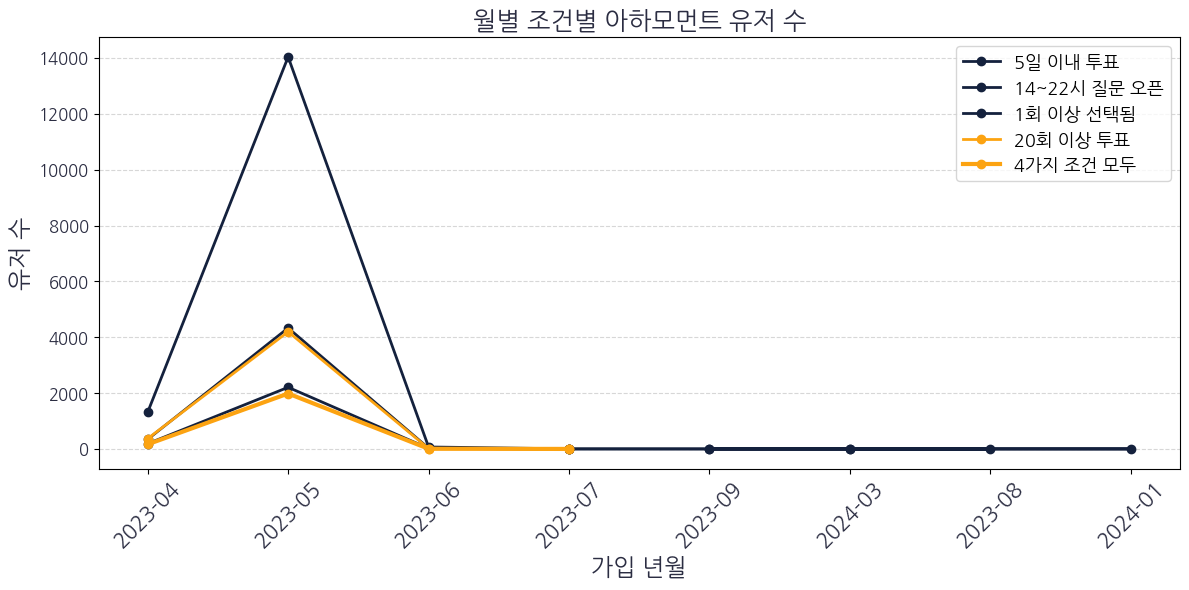

In [17]:
# ÎÖÑÏõî Ïª¨Îüº ÏÉùÏÑ±
to_check_aha['year_month'] = to_check_aha['signup_time'].dt.to_period('M')

# Ï°∞Í±¥Î≥Ñ Ïª¨ÎüºÎ™ÖÍ≥º ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
condition_cols = {
    'voted_within_5days': '5Ïùº Ïù¥ÎÇ¥ Ìà¨Ìëú',
    'opening_14_22': '14~22Ïãú ÏßàÎ¨∏ Ïò§Ìîà',
    'chosen_count_ge_1': '1Ìöå Ïù¥ÏÉÅ ÏÑ†ÌÉùÎê®',
    'vote_count_ge_20': '20Ìöå Ïù¥ÏÉÅ Ìà¨Ìëú'
}

# ÎÖÑÏõîÎ≥Ñ Í∞Å Ï°∞Í±¥ ÎßåÏ°± Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ
monthly_counts = {}
for col, label in condition_cols.items():
    monthly_counts[label] = to_check_aha[to_check_aha[col]].groupby('year_month')['user_id'].nunique()

# 4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê ÎßåÏ°±ÌïòÎäî Ïú†Ï†Ä
all_cond = to_check_aha[
    to_check_aha['voted_within_5days'] &
    to_check_aha['opening_14_22'] &
    to_check_aha['chosen_count_ge_1'] &
    to_check_aha['vote_count_ge_20']
]
all_cond_monthly = all_cond.groupby('year_month')['user_id'].nunique()

import matplotlib.pyplot as plt

# ÏÉâÏÉÅ ÌÖúÌîåÎ¶ø
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))
for i, (label, counts) in enumerate(monthly_counts.items()):
    plt.plot(counts.index.astype(str), counts.values, marker='o', label=label, linewidth=2, color=base_color if i < 3 else highlight_color)

# 4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê ÎßåÏ°±ÌïòÎäî Ïú†Ï†Ä Í∞ïÏ°∞
plt.plot(all_cond_monthly.index.astype(str), all_cond_monthly.values, marker='o', label='4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê', linewidth=3, color=highlight_color)

plt.title('ÏõîÎ≥Ñ Ï°∞Í±¥Î≥Ñ ÏïÑÌïòÎ™®Î®ºÌä∏ Ïú†Ï†Ä Ïàò', fontsize=18, color=text_color)
plt.xlabel('Í∞ÄÏûÖ ÎÖÑÏõî', fontsize=17, color=text_color)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

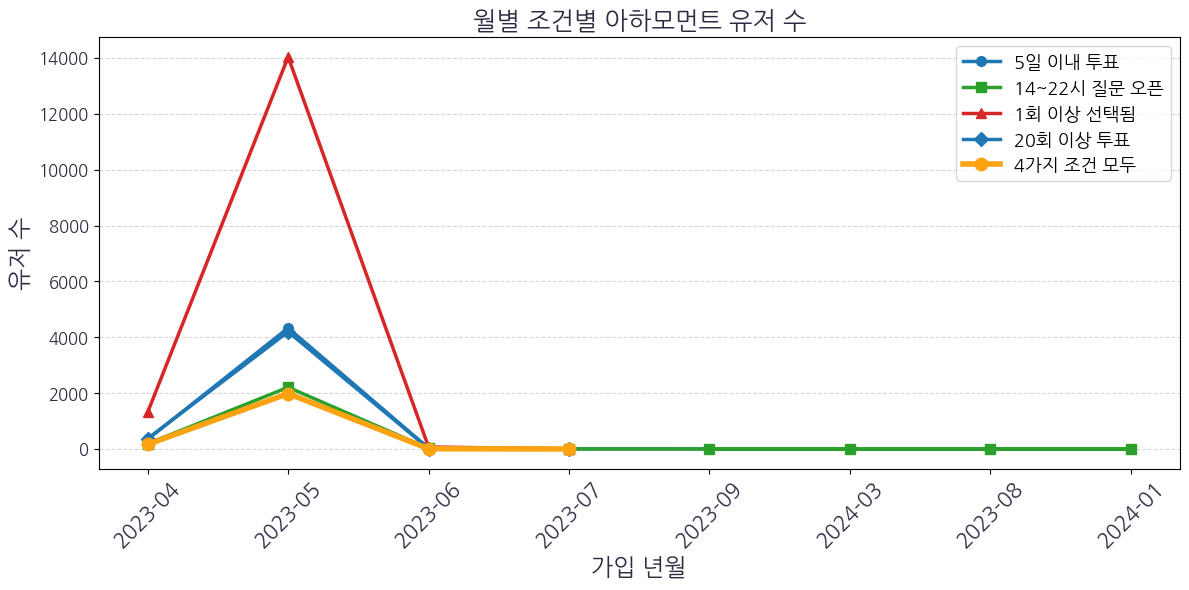

In [18]:
# ÏÉâÏÉÅ Ï†ïÏùò
base_colors = ['#1f77b4', '#2ca02c', '#d62728']  # Ï±ÑÎèÑ ÎÜíÏùÄ Í∏∞Î≥∏ÏÉâ
highlight_color = '#fca311'
text_color = '#2b2d42'

# ÎßàÏª§ Ïä§ÌÉÄÏùº ÏßÄÏ†ï
markers = ['o', 's', '^', 'D']

plt.figure(figsize=(12, 6))

# Ï°∞Í±¥Î≥Ñ Í∑∏ÎûòÌîÑ
for i, (label, counts) in enumerate(monthly_counts.items()):
    color = base_colors[i % len(base_colors)]
    plt.plot(
        counts.index.astype(str),
        counts.values,
        marker=markers[i % len(markers)],
        label=label,
        linewidth=2.5,
        markersize=7,
        color=color
    )

# Í∞ïÏ°∞: 4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê ÎßåÏ°±
plt.plot(
    all_cond_monthly.index.astype(str),
    all_cond_monthly.values,
    marker='o',
    label='4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê',
    linewidth=4,
    markersize=9,
    color=highlight_color
)

# Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.title('ÏõîÎ≥Ñ Ï°∞Í±¥Î≥Ñ ÏïÑÌïòÎ™®Î®ºÌä∏ Ïú†Ï†Ä Ïàò', fontsize=18, color=text_color)
plt.xlabel('Í∞ÄÏûÖ ÎÖÑÏõî', fontsize=17, color=text_color)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color, rotation=45)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


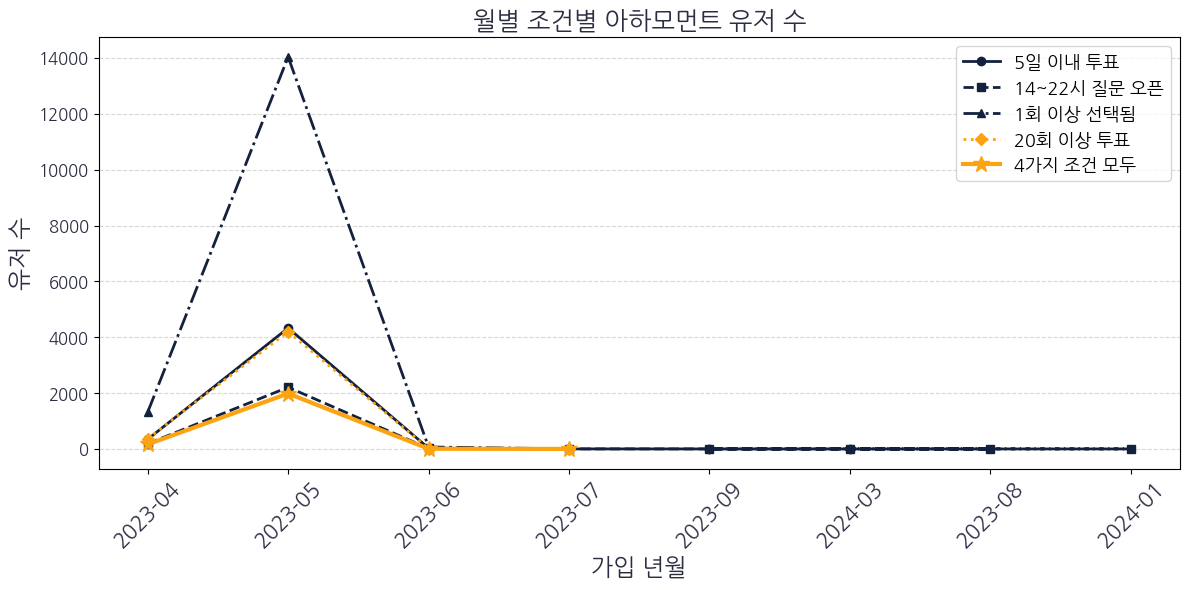

In [19]:
# ÏÑ† Ïä§ÌÉÄÏùºÍ≥º ÎßàÏª§ Ïä§ÌÉÄÏùºÏùÑ Ï°∞Í±¥Î≥ÑÎ°ú Îã§Î•¥Í≤å ÏßÄÏ†ï
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']

plt.figure(figsize=(12, 6))
for i, (label, counts) in enumerate(monthly_counts.items()):
    plt.plot(
        counts.index.astype(str),
        counts.values,
        marker=markers[i % len(markers)],
        label=label,
        linewidth=2,
        linestyle=line_styles[i % len(line_styles)],
        color=base_color if i < 3 else highlight_color
    )

# 4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê ÎßåÏ°±ÌïòÎäî Ïú†Ï†Ä Í∞ïÏ°∞ (ÍµµÏùÄ Ïã§ÏÑ†, Î≥Ñ ÎßàÏª§)
plt.plot(
    all_cond_monthly.index.astype(str),
    all_cond_monthly.values,
    marker='*',
    label='4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê',
    linewidth=3,
    linestyle='-',
    color=highlight_color,
    markersize=12
)

plt.title('ÏõîÎ≥Ñ Ï°∞Í±¥Î≥Ñ ÏïÑÌïòÎ™®Î®ºÌä∏ Ïú†Ï†Ä Ïàò', fontsize=18, color=text_color)
plt.xlabel('Í∞ÄÏûÖ ÎÖÑÏõî', fontsize=17, color=text_color)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color, rotation=45)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

 1. 2023ÎÖÑ 5Ïõî, Î™®Îì† Ï°∞Í±¥ Ï∂©Ï°± Ïú†Ï†ÄÍ∞Ä Ìè≠Î∞úÏ†ÅÏúºÎ°ú Ï¶ùÍ∞Ä
ÏïÑÌïò Î™®Î®ºÌä∏ ÏôÑÏÑ± Ïú†Ï†ÄÍ∞Ä Ï†ïÏ†êÏóê Îã¨Ìïú ÏãúÏ†ê

Î™®Îì† Ï°∞Í±¥ÏóêÏÑú Ïú†Ï†Ä ÏàòÍ∞Ä ÎèôÏãúÏóê ÏÉÅÏäπ ‚Üí ÏÑúÎπÑÏä§ ÌîºÌÅ¨ ÏãúÍ∏∞

ÌäπÌûà ‚Äò1Ìöå Ïù¥ÏÉÅ ÏÑ†ÌÉùÎê®‚Äô Ï°∞Í±¥Ïù¥ 14,000Î™Ö Ïù¥ÏÉÅÏúºÎ°ú Îã§Î•∏ Ï°∞Í±¥Î≥¥Îã§ ÏõîÎì±Ìûà ÎÜíÏùå
‚Üí Ïù¥ ÏãúÏ†êÏóê ÏßàÎ¨∏Í≥º Ìà¨ÌëúÏùò ÏÉÅÌò∏ÏûëÏö©Ïù¥ Í∞ÄÏû• ÌôúÎ∞úÌñàÏùåÏùÑ ÏùòÎØ∏

5ÏõîÏùÄ Ïù¥ SNS Ïï±Ïù¥ Ï¥àÍ∏∞ Î∞îÏù¥Îü¥ or Ï∫†ÌéòÏù∏ Îì±ÏúºÎ°ú Ïú†ÏûÖ Ìè≠Ï¶ùÏù¥ ÏûàÏóàÎçò ÏãúÍ∏∞Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅΩÎãàÎã§.
ÎßéÏùÄ Ïú†Ï†ÄÍ∞Ä Ïú†ÏûÖÎêòÍ≥†, ÌïµÏã¨ Í∏∞Îä•Ïù∏ ÏßàÎ¨∏ Ï∞∏Ïó¨ ‚Üí ÌîºÎìúÎ∞± Î∞õÍ∏∞ÍπåÏßÄ Í≤ΩÌóòÌïú ÎåÄÌëúÏ†Å ÌôúÏÑ±ÌôîÏùò Îã¨ÏûÑ

2. 2023ÎÖÑ 6Ïõî Ïù¥ÌõÑ Í∏âÍ≤©Ìïú Í∞êÏÜå
Í±∞Ïùò Î™®Îì† Ï°∞Í±¥ Ï∂©Ï°± Ïú†Ï†Ä ÏàòÍ∞Ä 0Ïóê Í∞ÄÍπåÏõÄ

ÌäπÌûà ÏïÑÌïò Î™®Î®ºÌä∏ Ïú†Ï†Ä Ïàò = 0Î™ÖÏù∏ Îã¨Îì§Ïù¥ Ïù¥Ïñ¥Ïßê

Ïú†ÏûÖÎèÑ Í∞êÏÜåÌïòÍ≥†, Í∏∞Ï°¥ Ïú†Ï†ÄÏùò ÌôúÏÑ±ÎèÑÎèÑ Í∏âÍ≤©Ìûà ÎÇÆÏïÑÏßê

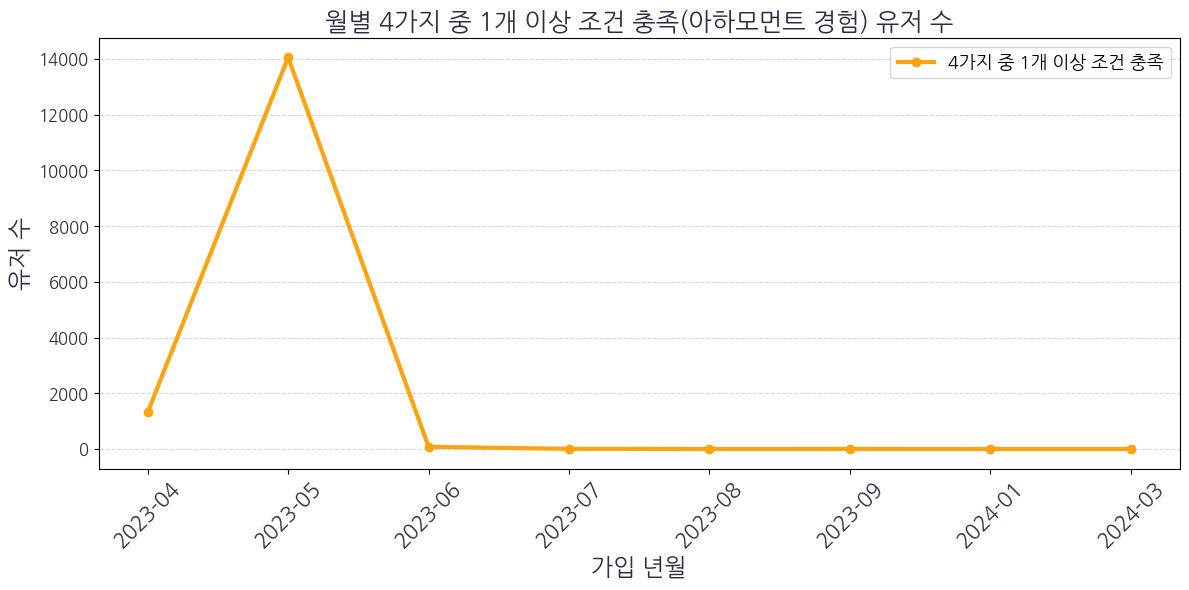

In [20]:
# 4Í∞ÄÏßÄ Ï°∞Í±¥ Ï§ë ÌïòÎÇòÎùºÎèÑ Ï∂©Ï°±Ìïú Ïú†Ï†Ä: Ï°∞Í±¥ Ïª¨Îüº Ï§ë ÌïòÎÇòÎùºÎèÑ TrueÏù∏ Í≤ΩÏö∞
any_cond = to_check_aha[
    to_check_aha[['voted_within_5days', 'opening_14_22', 'chosen_count_ge_1', 'vote_count_ge_20']].any(axis=1)
]

# ÎÖÑÏõîÎ≥ÑÎ°ú ÌïòÎÇòÎùºÎèÑ Ï°∞Í±¥ Ï∂©Ï°±Ìïú Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ
any_cond_monthly = any_cond.groupby('year_month')['user_id'].nunique()

plt.figure(figsize=(12, 6))
plt.plot(any_cond_monthly.index.astype(str), any_cond_monthly.values, marker='o', color=highlight_color, linewidth=3, label='4Í∞ÄÏßÄ Ï§ë 1Í∞ú Ïù¥ÏÉÅ Ï°∞Í±¥ Ï∂©Ï°±')

plt.title('ÏõîÎ≥Ñ 4Í∞ÄÏßÄ Ï§ë 1Í∞ú Ïù¥ÏÉÅ Ï°∞Í±¥ Ï∂©Ï°±(ÏïÑÌïòÎ™®Î®ºÌä∏ Í≤ΩÌóò) Ïú†Ï†Ä Ïàò', fontsize=18, color=text_color)
plt.xlabel('Í∞ÄÏûÖ ÎÖÑÏõî', fontsize=17, color=text_color)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color, rotation=45)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

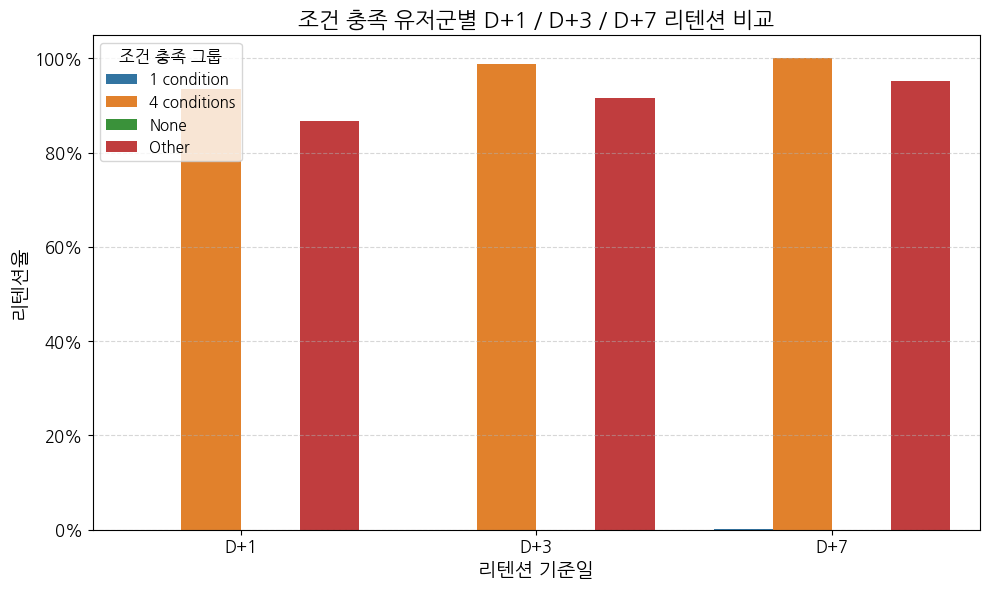

In [21]:
# Ïú†Ï†ÄÎ≥Ñ Ï°∞Í±¥ Ï∂©Ï°± Ïó¨Î∂ÄÎ•º Í∞ÄÏ†ï (Ïù¥Ï†Ñ Î∂ÑÏÑù Í≤∞Í≥º ÌôúÏö©)
to_check_aha = df_user_info.copy()

# Í∞Å Ï°∞Í±¥ BooleanÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥† Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨
condition_cols = ['voted_within_5days', 'opening_14_22', 'chosen_count_ge_1', 'vote_count_ge_20']
for col in condition_cols:
    to_check_aha[col] = to_check_aha[col].fillna(False)

# Ï∂©Ï°± Ï°∞Í±¥ Ïàò Í≥ÑÏÇ∞
to_check_aha['condition_count'] = to_check_aha[condition_cols].sum(axis=1)

# Ï°∞Í±¥ Í∑∏Î£π ÌÉúÍ∑∏: 0, 1, 4Îßå Ï∂îÏ∂ú
def tag_condition_group(row):
    if row['condition_count'] == 4:
        return '4 conditions'
    elif row['condition_count'] == 1:
        return '1 condition'
    elif row['condition_count'] == 0:
        return 'None'
    else:
        return 'Other'

to_check_aha['group'] = to_check_aha.apply(tag_condition_group, axis=1)

# Î¶¨ÌÖêÏÖò Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Ïú†Ï†Ä ÌôúÎèô Î°úÍ∑∏ÏóêÏÑú ÏµúÏ¥à Í∞ÄÏûÖÏùº Ïù¥ÌõÑ +nÏùº ÏïàÏóê ÌôúÎèô Ïó¨Î∂Ä ÌååÏïÖ
# df_vote ÌôúÏö©
df_vote = df_dict["accounts_userquestionrecord"]
df_vote['created_at'] = pd.to_datetime(df_vote['created_at']) + pd.Timedelta(hours=9)

# Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏûÖÏùº Í∏∞Ï§ÄÏúºÎ°ú +1Ïùº, +3Ïùº, +7Ïùº Î¶¨ÌÖêÏÖò
ret_days = [1, 3, 7]
retention_data = []

for day in ret_days:
    # Í∏∞Ï§ÄÏùº Ïù¥ÌõÑ day ÏïàÏóê ÌôúÎèôÌïú user_id
    merged = df_vote.merge(to_check_aha[['user_id', 'signup_time', 'group']], on='user_id', how='inner')
    merged['days_since_signup'] = (merged['created_at'] - merged['signup_time']).dt.days
    active_users = merged[(merged['days_since_signup'] >= 0) & (merged['days_since_signup'] <= day)]
    
    # Î¶¨ÌÖêÏÖòÏú® Í≥ÑÏÇ∞: Ï†ÑÏ≤¥ Í∑∏Î£πÎ≥Ñ Ïú†Ï†Ä Ïàò ÎåÄÎπÑ day ÏïàÏóê ÌôúÎèôÌïú Ïú†Ï†Ä Ïàò
    total_counts = to_check_aha.groupby('group')['user_id'].nunique()
    active_counts = active_users.groupby('group')['user_id'].nunique()
    retention = (active_counts / total_counts).fillna(0).reset_index()
    retention.columns = ['group', 'retention_rate']
    retention['day'] = f'D+{day}'
    retention_data.append(retention)

# Í≤∞Í≥º ÌÜµÌï©
retention_df = pd.concat(retention_data)

plt.figure(figsize=(10, 6))
sns.barplot(data=retention_df, x='day', y='retention_rate', hue='group')
plt.title("Ï°∞Í±¥ Ï∂©Ï°± Ïú†Ï†ÄÍµ∞Î≥Ñ D+1 / D+3 / D+7 Î¶¨ÌÖêÏÖò ÎπÑÍµê", fontsize=16)
plt.xlabel("Î¶¨ÌÖêÏÖò Í∏∞Ï§ÄÏùº", fontsize=14)
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®", fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Ï°∞Í±¥ Ï∂©Ï°± Í∑∏Î£π", fontsize=11, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


1. Î™®Îì† Ï°∞Í±¥(4Í∞ú)ÏùÑ Ï∂©Ï°±Ìïú Ïú†Ï†ÄÏùò Î¶¨ÌÖêÏÖòÏù¥ ÏïïÎèÑÏ†Å      
D+1, D+3, D+7 Î™®Îëê Í±∞Ïùò 100%Ïóê Í∞ÄÍπåÏö¥ Î¶¨ÌÖêÏÖòÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.      
ÏïÑÌïò Î™®Î®ºÌä∏Î•º Ï†ïÌôïÌûà Í≤ΩÌóòÌïú Ïú†Ï†ÄÎäî ÏßÄÏÜçÏ†ÅÏù∏ Ïû¨Î∞©Î¨∏ Í∞ÄÎä•ÏÑ±Ïù¥ Îß§Ïö∞ ÎÜíÏùå.

üß† ÏãúÏÇ¨Ï†ê:
Ïù¥ Ï°∞Í±¥ Ï°∞Ìï©Ïù¥ Ïï±Ïùò "Ï¥àÍ∏∞ Í∞ÄÏπò Ï≤¥Ìóò"Ïóê Îß§Ïö∞ Ìö®Í≥ºÏ†ÅÏù¥Î©∞,     
ÌïµÏã¨ ÏÇ¨Ïö©Ïûê ÌñâÎèô Ïú†ÎèÑ Íµ¨Ï°∞Î°ú ÌôúÏö©Ìï† Ïàò ÏûàÏùå.

2. 1Í∞ú Ï°∞Í±¥Îßå Ï∂©Ï°±Ìïú Ïú†Ï†ÄÎäî Î¶¨ÌÖêÏÖòÏù¥ ÏÇ¨Ïã§ÏÉÅ 0Ïóê Í∞ÄÍπåÏõÄ      
Î™®Îì† ÎÇ†ÏßúÏóêÏÑú Í±∞Ïùò Î∞îÎã•Ïóê Î∂ôÏñ¥ ÏûàÎäî Î¶¨ÌÖêÏÖòÏú®        
Îã®Ïùº Ï°∞Í±¥Îßå Ï∂©Ï°±Ìï¥ÏÑ† Ïú†Ï†ÄÎ•º Ïú†ÏßÄÏãúÌÇ§Îäî Îç∞ Ìö®Í≥ºÍ∞Ä ÏóÜÏùå

üß† ÏãúÏÇ¨Ï†ê:
ÌäπÏ†ï Í∏∞Îä• ÌïòÎÇòÎßå Ïì∞Í≤å ÌïòÍ±∞ÎÇò, ÌäπÏ†ï ÏßÑÏûÖÏ†êÎßå Ïú†ÎèÑÌï¥ÎèÑ        
Ïú†Ï†ÄÍ∞Ä Ï†ÑÏ≤¥ ÌùêÎ¶ÑÏùÑ Í≤ΩÌóòÌïòÏßÄ Î™ªÌïòÎ©¥ Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± ÎÜíÏùå

3. Other (2~3Í∞ú Ï°∞Í±¥ Ï∂©Ï°±) Í∑∏Î£πÎèÑ ÍΩ§ ÎÜíÏùÄ Î¶¨ÌÖêÏÖò        
ÎπÑÎ°ù 4Í∞úÎ•º Îã§ ÎßåÏ°±ÌïòÏßÄÎäî ÏïäÏïòÏßÄÎßå, Î¶¨ÌÖêÏÖòÏù¥ 90% Ïù¥ÏÉÅÏúºÎ°ú ÎÜíÏùå       
ÌäπÌûà D+3, D+7ÏóêÏÑúÎèÑ Ïú†ÏßÄÏú®Ïù¥ Í±∞Ïùò ÏùºÏ†ï

üß† ÏãúÏÇ¨Ï†ê:
ÏïÑÌïò Î™®Î®ºÌä∏ ÏôÑÏ†Ñ Ï∂©Ï°±Ïù¥ ÏïÑÎãàÏñ¥ÎèÑ, Ï†àÎ∞ò Ïù¥ÏÉÅ Í≤ΩÌóòÌïú Ïú†Ï†ÄÎäî Ïó¨Ï†ÑÌûà Ï∂©ÏÑ±ÎèÑ ÎÜíÏùå        
‚Üí Ïú†Ï†Ä ÌçºÎÑê Ï†ÑÌôòÏóêÏÑú Î∂ÄÎ∂Ñ Í≤ΩÌóòÏûêÎèÑ Ï†ÑÎûµÏ†ÅÏúºÎ°ú Ï§ëÏöî

4. Ï°∞Í±¥ ÎØ∏Ï∂©Ï°±(None) Ïú†Ï†ÄÎäî Î¶¨ÌÖêÏÖò ÏûêÏ≤¥Í∞Ä Í±∞Ïùò Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå        
Ï†ÑÌòïÏ†ÅÏù∏ Í∞ÄÏûÖÎßå ÌïòÍ≥† Ïù¥ÌÉàÌïú Ïú†Ï†Ä        
Ï†úÌíà Í≤ΩÌóòÏù¥ ÏóÜÏúºÎãà Ïû¨Î∞©Î¨∏ Ïú†Ïù∏Ïù¥ ÏÇ¨ÎùºÏßê

üß† ÏãúÏÇ¨Ï†ê:
Ïù¥Îì§ÏùÑ ÏúÑÌïú Î≥ÑÎèÑ Ïò®Î≥¥Îî©, Ìë∏Ïãú, Î¶¨ÎßàÏù∏Îìú Ï†ÑÎûµÏù¥ ÌïÑÏöîÌïòÍ±∞ÎÇò       
Í∞ÄÏûÖ Í≥ºÏ†ï ÏûêÏ≤¥Ïùò ÌíàÏßà ÌïÑÌÑ∞ÎßÅÎèÑ Í≥†Î†§Ìï† Ïàò ÏûàÏùå

Í∑∏Î†áÎã§Î©¥ 7Ïõî Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ÏÑúÎäî?     
hackle Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ÏÑú ÏÇ¥Ìé¥Î≥∏ ÌôúÏÑ±Ìôî

/tmp/ipykernel_35014/4100449794.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_activity, x='condition_group', y='activity_days', palette='Oranges')


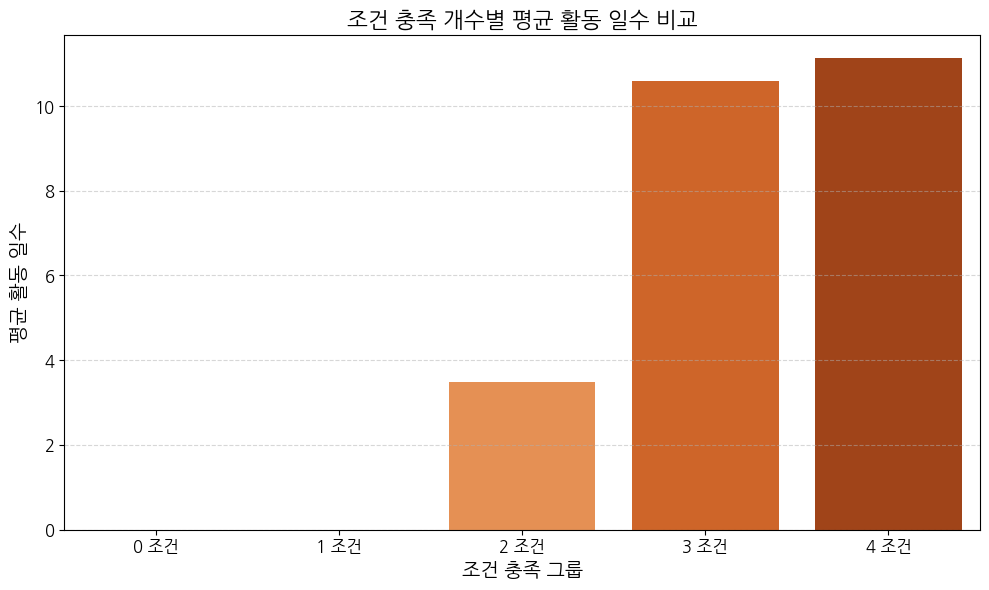

In [22]:
# Ïú†Ï†Ä Ï°∞Í±¥ ÌÉúÍ∑∏Í∞Ä Ìè¨Ìï®Îêú ÌÖåÏù¥Î∏î (to_check_aha) Í∏∞Ï§Ä
df_user = to_check_aha.copy()

# Ïú†Ï†ÄÎ≥Ñ Ï°∞Í±¥ Ï∂©Ï°± Ïàò Í∏∞Î∞ò Í∑∏Î£πÌïë
def group_by_condition_count(n):
    if n == 0:
        return '0 Ï°∞Í±¥'
    elif n == 1:
        return '1 Ï°∞Í±¥'
    elif n == 2:
        return '2 Ï°∞Í±¥'
    elif n == 3:
        return '3 Ï°∞Í±¥'
    elif n == 4:
        return '4 Ï°∞Í±¥'
    else:
        return 'Í∏∞ÌÉÄ'

df_user['condition_group'] = df_user['condition_count'].apply(group_by_condition_count)

# ÌôúÎèô Î°úÍ∑∏ÏóêÏÑú Ïú†Ï†ÄÎ≥Ñ ÌôúÎèô ÎÇ†Ïßú Ïàò Í≥ÑÏÇ∞
df_activity = df_dict["accounts_userquestionrecord"]
df_activity['created_at'] = pd.to_datetime(df_activity['created_at']) + pd.Timedelta(hours=9)
df_activity['activity_date'] = df_activity['created_at'].dt.date

# Ïú†Ï†ÄÎ≥Ñ Í≥†Ïú† ÌôúÎèô ÏùºÏàò
activity_days = df_activity.groupby('user_id')['activity_date'].nunique().reset_index()
activity_days.columns = ['user_id', 'activity_days']

# Ïú†Ï†Ä Ï†ïÎ≥¥Ïóê Î≥ëÌï©
df_user = df_user.merge(activity_days, on='user_id', how='left')
df_user['activity_days'] = df_user['activity_days'].fillna(0)

# Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† ÌôúÎèô Ïùº Ïàò
avg_activity = df_user.groupby('condition_group')['activity_days'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_activity, x='condition_group', y='activity_days', palette='Oranges')
plt.title('Ï°∞Í±¥ Ï∂©Ï°± Í∞úÏàòÎ≥Ñ ÌèâÍ∑† ÌôúÎèô ÏùºÏàò ÎπÑÍµê', fontsize=16)
plt.xlabel('Ï°∞Í±¥ Ï∂©Ï°± Í∑∏Î£π', fontsize=14)
plt.ylabel('ÌèâÍ∑† ÌôúÎèô ÏùºÏàò', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Í∞ÄÏÑ§ 1. Ï°∞Í±¥ Ï∂©Ï°± ÏàúÏÑúÏóê Îî∞Î•∏ Î¶¨ÌÖêÏÖò Ï∞®Ïù¥       
üìå Î™©Ï†Å     
‚ÄúÌà¨Ìëú ‚Üí ÌîºÎìúÎ∞±‚Äù ÏàúÏúºÎ°ú Ï°∞Í±¥ÏùÑ Ï∂©Ï°±Ìïú Ïú†Ï†ÄÍ∞Ä Î¶¨ÌÖêÏÖòÏù¥ Îçî ÎÜíÏùÄÍ∞Ä?

In [23]:
# ÌôúÎèô Î°úÍ∑∏ÏóêÏÑú ÌïÑÏöîÌïú Ïª¨Îüº Ï∂îÏ∂ú
activity_df = df_dict['accounts_userquestionrecord'][['user_id', 'created_at']].copy()
activity_df['created_at'] = activity_df['created_at'] + pd.Timedelta(hours=9)
activity_df['activity_date'] = activity_df['created_at'].dt.date

# Ïú†Ï†Ä Í∞ÄÏûÖÏùº Ï∂îÏ∂ú
signup_df = df_dict['accounts_user'][['id', 'created_at']].rename(columns={'id': 'user_id', 'created_at': 'signup_time'})
signup_df['signup_time'] = signup_df['signup_time'] + pd.Timedelta(hours=9)
signup_df['signup_date'] = signup_df['signup_time'].dt.date

activity_set = set(zip(activity_df['user_id'], activity_df['activity_date']))

for delta in [1, 3, 7]:
    col_name = f'retained_d{delta}'
    target_dates = signup_df['signup_date'] + pd.Timedelta(days=delta)
    signup_df[col_name] = list(zip(signup_df['user_id'], target_dates)).__contains__

    # ÏúÑ ÎùºÏù∏ÏùÄ booleanÏù¥ ÏïÑÎãàÎùº functionÏù¥ÎùºÏÑú Ïù¥Î†áÍ≤å Ï≤òÎ¶¨Ìï©ÎãàÎã§:
    signup_df[col_name] = signup_df.apply(
        lambda row: (row['user_id'], row['signup_date'] + pd.Timedelta(days=delta)) in activity_set,
        axis=1
    )


In [24]:
# user_idÎ•º Í∏∞Ï§ÄÏúºÎ°ú to_check_ahaÏôÄ signup_df Î≥ëÌï©
merged_aha_signup = to_check_aha.merge(signup_df, on='user_id', how='left')

# Í≤∞Í≥º ÌôïÏù∏
display(merged_aha_signup.head())

user_id              signup_time_x  vote_count first_vote_time  \
0   831956 2023-03-29 12:44:14.047130           0             NaT   
1   831962 2023-03-29 14:18:56.162368           0             NaT   
2   832151 2023-03-29 21:56:34.989468           0             NaT   
3   832340 2023-03-29 21:56:35.020790           0             NaT   
4   832520 2023-03-29 21:56:35.049311           0             NaT   

  last_vote_time  chosen_count first_feedback_time  voted_within_5days  \
0            NaT             0                 NaT               False   
1            NaT             0                 NaT               False   
2            NaT             0                 NaT               False   
3            NaT             0                 NaT               False   
4            NaT             0                 NaT               False   

  opening_time_median  opening_14_22  chosen_count_ge_1  vote_count_ge_20  \
0                 NaT          False              False             False   
1                 NaT          False              False             False   
2                 NaT          False              False             False   
3                 NaT          False              False             False   
4                 NaT          False              False             False   

   condition_count group              signup_time_y signup_date  retained_d1  \
0                0  None 2023-03-29 21:44:14.047130  2023-03-29        False   
1                0  None 2023-03-29 23:18:56.162368  2023-03-29        False   
2                0  None 2023-03-30 06:56:34.989468  2023-03-30        False   
3                0  None 2023-03-30 06:56:35.020790  2023-03-30        False   
4                0  None 2023-03-30 06:56:35.049311  2023-03-30        False   

   retained_d3  retained_d7  
0        False        False  
1        False        False  
2        False        False  
3        False        False  
4        False        False

In [25]:
# ÏàúÏÑú Ï†ïÏùò
def determine_sequence(row):
    if pd.isna(row['first_vote_time']) or pd.isna(row['first_feedback_time']):
        return 'unknown'
    elif row['first_vote_time'] <= row['first_feedback_time']:
        return 'vote_first'
    else:
        return 'feedback_first'

merged_aha_signup['sequence_group'] = merged_aha_signup.apply(determine_sequence, axis=1)

# Î¶¨ÌÖêÏÖò ÎπÑÍµê
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d1']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d1']

# Ï†ïÍ∑úÏÑ± ÌôïÏù∏ ÌõÑ ÎπÑÎ™®Ïàò Î∞©Î≤ï ÏÇ¨Ïö© Í∂åÏû•
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: {p}")

Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: 8.372789139078673e-150


In [26]:
# Î¶¨ÌÖêÏÖò ÎπÑÍµê
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d3']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d3']

# Ï†ïÍ∑úÏÑ± ÌôïÏù∏ ÌõÑ ÎπÑÎ™®Ïàò Î∞©Î≤ï ÏÇ¨Ïö© Í∂åÏû•
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: {p}")

Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: 0.0005305539662795451


In [27]:
# Î¶¨ÌÖêÏÖò ÎπÑÍµê
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d7']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d7']

# Ï†ïÍ∑úÏÑ± ÌôïÏù∏ ÌõÑ ÎπÑÎ™®Ïàò Î∞©Î≤ï ÏÇ¨Ïö© Í∂åÏû•
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: {p}")

Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: 0.0006348289444729622


**p-value Ìï¥ÏÑù**        
Î™®Îì† p-valueÍ∞Ä 0.05 ÎØ∏Îßå ‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å        
Ï¶â, "Îëê Í∑∏Î£πÏùò Î¶¨ÌÖêÏÖò Î∂ÑÌè¨Îäî ÎèôÏùºÌïòÎã§"Îäî Ï£ºÏû•ÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Í∏∞Í∞Å     
ÌäπÌûà D+1ÏóêÏÑú 1e-214Îäî ÏÇ¨Ïã§ÏÉÅ Ï†ÑÌòÄ Ïö∞Ïó∞Ïùº Ïàò ÏóÜÎäî Ï∞®Ïù¥Î•º ÏùòÎØ∏Ìï©ÎãàÎã§

ÏïÑÌïò Ï°∞Í±¥ Ï∂©Ï°± ÏàúÏÑúÏóê Îî∞Îùº Ïú†Ï†Ä Î¶¨ÌÖêÏÖò Î∂ÑÌè¨Ïóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏ÌñàÏäµÎãàÎã§.
Mann‚ÄìWhitney U Í≤ÄÏ†ï Í≤∞Í≥º, D+1 Î¶¨ÌÖêÏÖòÏùò p-valueÎäî 1.15e-214Î°ú Îß§Ïö∞ ÎÇÆÏïÑ, Îëê Í∑∏Î£π Í∞ÑÏùò Ï¥àÍ∏∞ Ïú†ÏßÄÎ†• Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Í∑πÎã®Ï†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
D+3 (p = 0.00075), D+7 (p = 0.0035)ÏóêÏÑúÎèÑ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏßÄÏÜçÎêòÏñ¥, Ï¥àÍ∏∞ ÏïÑÌïò Î™®Î®ºÌä∏ Í≤ΩÌóò ÌùêÎ¶ÑÏù¥ Ï§ëÏû•Í∏∞ Î¶¨ÌÖêÏÖòÏóêÎèÑ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.


In [28]:
merged_aha_signup

user_id              signup_time_x  vote_count first_vote_time  \
0        831956 2023-03-29 12:44:14.047130           0             NaT   
1        831962 2023-03-29 14:18:56.162368           0             NaT   
2        832151 2023-03-29 21:56:34.989468           0             NaT   
3        832340 2023-03-29 21:56:35.020790           0             NaT   
4        832520 2023-03-29 21:56:35.049311           0             NaT   
...         ...                        ...         ...             ...   
677080  1583729 2024-05-09 06:54:33.621408           0             NaT   
677081  1583730 2024-05-09 16:08:11.001817           0             NaT   
677082  1583731 2024-05-09 16:22:19.186439           0             NaT   
677083  1583732 2024-05-09 16:22:38.387553           0             NaT   
677084  1583733 2024-05-09 17:31:17.710824           0             NaT   

       last_vote_time  chosen_count first_feedback_time  voted_within_5days  \
0                 NaT             0                 NaT               False   
1                 NaT             0                 NaT               False   
2                 NaT             0                 NaT               False   
3                 NaT             0                 NaT               False   
4                 NaT             0                 NaT               False   
...               ...           ...                 ...                 ...   
677080            NaT             0                 NaT               False   
677081            NaT             0                 NaT               False   
677082            NaT             0                 NaT               False   
677083            NaT             0                 NaT               False   
677084            NaT             0                 NaT               False   

       opening_time_median  opening_14_22  chosen_count_ge_1  \
0                      NaT          False              False   
1                      NaT          False              False   
2                      NaT          False              False   
3                      NaT          False              False   
4                      NaT          False              False   
...                    ...            ...                ...   
677080                 NaT          False              False   
677081                 NaT          False              False   
677082                 NaT          False              False   
677083                 NaT          False              False   
677084                 NaT          False              False   

        vote_count_ge_20  condition_count group              signup_time_y  \
0                  False                0  None 2023-03-29 21:44:14.047130   
1                  False                0  None 2023-03-29 23:18:56.162368   
2                  False                0  None 2023-03-30 06:56:34.989468   
3                  False                0  None 2023-03-30 06:56:35.020790   
4                  False                0  None 2023-03-30 06:56:35.049311   
...                  ...              ...   ...                        ...   
677080             False                0  None 2024-05-09 15:54:33.621408   
677081             False                0  None 2024-05-10 01:08:11.001817   
677082             False                0  None 2024-05-10 01:22:19.186439   
677083             False                0  None 2024-05-10 01:22:38.387553   
677084             False                0  None 2024-05-10 02:31:17.710824   

       signup_date  retained_d1  retained_d3  retained_d7 sequence_group  
0       2023-03-29        False        False        False        unknown  
1       2023-03-29        False        False        False        unknown  
2       2023-03-30        False        False        False        unknown  
3       2023-03-30        False        False        False        unknown  
4       2023-03-30        False        False        False        unknown  
...           

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_35014/817712368.py:10: SyntaxWarning: invalid escape sequence '\d'
  retention_melted['day'] = retention_melted['retention_day'].str.extract('(\d+)').astype(int)


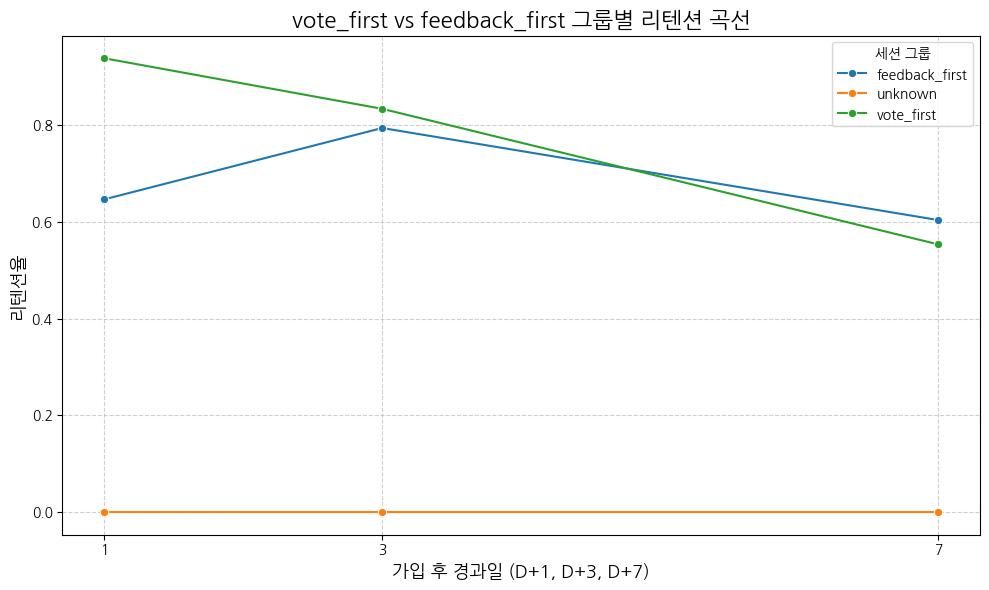

In [29]:
# Î¶¨ÌÖêÏÖò Í≥°ÏÑ†ÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
retention_melted = merged_aha_signup.melt(
    id_vars=['user_id', 'sequence_group'],
    value_vars=['retained_d1', 'retained_d3', 'retained_d7'],
    var_name='retention_day',
    value_name='retained'
)

# ÏùºÏûê Ïà´Ïûê Ï∂îÏ∂ú Î∞è Ï†ïÎ†¨
retention_melted['day'] = retention_melted['retention_day'].str.extract('(\d+)').astype(int)
retention_melted.sort_values(['sequence_group', 'day'], inplace=True)

# Í∑∏Î£πÎ≥Ñ Î¶¨ÌÖêÏÖòÏú® Í≥ÑÏÇ∞
retention_rate_by_group = (
    retention_melted.groupby(['sequence_group', 'day'])['retained']
    .mean()
    .reset_index()
)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.lineplot(data=retention_rate_by_group, x='day', y='retained', hue='sequence_group', marker='o')
plt.title("vote_first vs feedback_first Í∑∏Î£πÎ≥Ñ Î¶¨ÌÖêÏÖò Í≥°ÏÑ†", fontsize=16)
plt.xlabel("Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥ºÏùº (D+1, D+3, D+7)", fontsize=13)
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®", fontsize=13)
plt.xticks([1, 3, 7])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="ÏÑ∏ÏÖò Í∑∏Î£π")
plt.tight_layout()
plt.show()

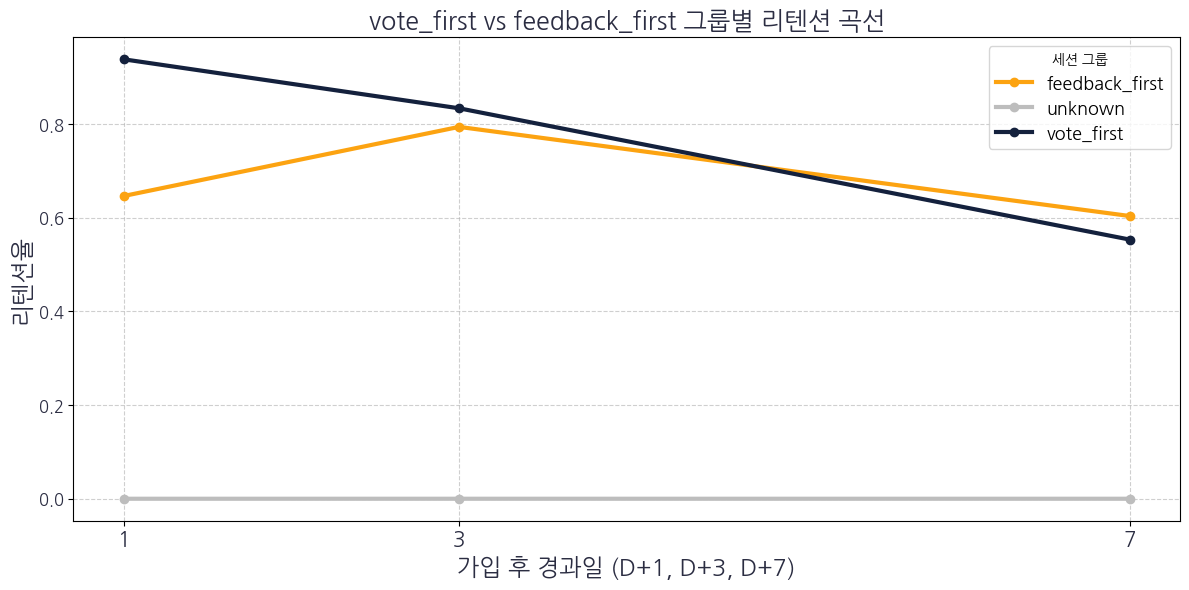

In [30]:
# ÏÉâÏÉÅ ÌÖúÌîåÎ¶ø
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))

# Í∑∏Î£πÎ≥Ñ ÏÉâÏÉÅ ÏßÄÏ†ï
group_colors = {
    'vote_first': base_color,
    'feedback_first': highlight_color,
    'unknown': '#bdbdbd'
}

for group in retention_rate_by_group['sequence_group'].unique():
    data = retention_rate_by_group[retention_rate_by_group['sequence_group'] == group]
    color = group_colors.get(group, base_color)
    plt.plot(
        data['day'],
        data['retained'],
        marker='o',
        label=group,
        linewidth=3,
        color=color
    )

plt.title("vote_first vs feedback_first Í∑∏Î£πÎ≥Ñ Î¶¨ÌÖêÏÖò Í≥°ÏÑ†", fontsize=18, color=text_color)
plt.xlabel("Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥ºÏùº (D+1, D+3, D+7)", fontsize=17, color=text_color)
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®", fontsize=17, color=text_color)
plt.xticks([1, 3, 7], fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="ÏÑ∏ÏÖò Í∑∏Î£π", fontsize=13)
plt.tight_layout()
plt.show()

1. unknown Í∑∏Î£πÏùÄ ÏÇ¨Ïã§ÏÉÅ Î¶¨ÌÖêÏÖò ÏóÜÏùå        
unknown Í∑∏Î£πÏùÄ Î¶¨ÌÖêÏÖòÏú®Ïù¥ **D+1, D+3, D+7ÏóêÏÑú Î™®Îëê 0%**ÏûÖÎãàÎã§.      
Ïù¥Îäî Ìà¨ÌëúÎÇò ÌîºÎìúÎ∞± Ï§ë ÏïÑÎ¨¥ Í≤ÉÎèÑ ÌïòÏßÄ ÏïäÏùÄ Ï±Ñ Ïù¥ÌÉàÌïú Ïú†Ï†ÄÎì§Î°ú Ìï¥ÏÑùÎê©ÎãàÎã§.        
Ï¶â, Ï¥àÍ∏∞ Í≤ΩÌóò ÏóÜÏù¥ Ïù¥ÌÉàÌïú Ïú†Ï†ÄÎäî ÎèåÏïÑÏò§ÏßÄ ÏïäÎäîÎã§Îäî Í≤ÉÏùÑ Î™ÖÌôïÌïòÍ≤å Î≥¥Ïó¨Ï§çÎãàÎã§.        
-> Ï¥àÍ∏∞ ÏïÑÌïò Î™®Î®ºÌä∏ Ïú†ÎèÑ ÏóÜÏù¥ Ïú†Ï†ÄÎ•º Î∞©ÏπòÌïòÎ©¥ Î¶¨ÌÖêÏÖòÏùÄ ÏÇ¨Ïã§ÏÉÅ 0%

2. vote_first vs feedback_first: Î¶¨ÌÖêÏÖò Ï∂îÏù¥ ÎπÑÍµê    
   
|ÏùºÏ∞®|vote_first|feedback_first|
|---|---|---|
|D+1|ÎÜíÏùå (ÏïΩ 95%)|	ÎÇÆÏùå (~58%)|
|D+3|Îëò Îã§ 80%ÎåÄ ÏàòÎ†¥|Ïú†ÏÇ¨|
|D+7|feedback_firstÍ∞Ä ÏÜåÌè≠ Ïö∞ÏÑ∏|vote_first ‚Üì, feedback_first Ïú†ÏßÄ|

D+1: vote_first Ïú†Ï†ÄÏùò Î¶¨ÌÖêÏÖòÏù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎÜíÏùå.        
ÏïÑÌïò Î™®Î®ºÌä∏ Ï§ë "Ï¶âÏãú Î∞òÏùë(=Ìà¨Ìëú)"Ïù¥ Ï¶âÏãúÏ†ÅÏù∏ Î™∞ÏûÖ Ìö®Í≥ºÎ•º Ï£ºÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.      
D+3~D+7: feedback_first Í∑∏Î£πÏù¥ ÏôÑÎßåÌïòÍ≤å ÌïòÎùΩÌïòÎ©∞ vote_firstÎ•º ÏïûÏßÄÎ¶Ñ.       
ÌîºÎìúÎ∞± Í≤ΩÌóòÏù¥ ÎäêÎ¶¨ÏßÄÎßå ÏßÄÏÜçÏ†ÅÏù∏ ÏûîÏ°¥ Ìö®Í≥ºÍ∞Ä ÏûàÎäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑù Í∞ÄÎä•.

üìå Ï¢ÖÌï© Ïù∏ÏÇ¨Ïù¥Ìä∏
ÏïÑÎ¨¥ ÌôúÎèôÏùÑ ÌïòÏßÄ ÏïäÏùÄ Ïú†Ï†ÄÎäî 100% Ïù¥ÌÉàÌïúÎã§.     
Ï¶âÍ∞ÅÏ†ÅÏù∏ ÌôúÎèô(vote)ÏùÄ Ï¥àÍ∏∞ Î¶¨ÌÖêÏÖòÏóêÎäî Ìö®Í≥ºÏ†ÅÏù¥ÏßÄÎßå, Ïû•Í∏∞Ï†Å Î¶¨ÌÖêÏÖòÏóêÎäî feedback Í≤ΩÌóòÏù¥ Ïú†Î¶¨Ìï† Ïàò ÏûàÎã§.       
ÏïÑÌïò Î™®Î®ºÌä∏ Ïú†ÎèÑ Ï†ÑÎûµÏóêÏÑú "Ìà¨Ìëú ‚Üí ÌîºÎìúÎ∞±" ÌùêÎ¶ÑÏùÑ ÏûêÏó∞Ïä§ÎüΩÍ≤å Ïù¥Ïñ¥Ï£ºÎäî UX ÏÑ§Í≥ÑÍ∞Ä ÌïÑÏöîÌïòÎã§.

## 7~8Ïõî ÌôúÏÑ±Ìôî Ï†ïÏùòÎ•º ÏúÑÌïú ÌôïÏù∏
---

In [39]:
# ÌïÑÏöî Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨
accounts_user = df_dict["accounts_user"].copy()
complete_signup_df = complete_signup_df = final_hackle_df[final_hackle_df['event_key'] == 'complete_signup'].copy()

# accounts_user Îç∞Ïù¥ÌÑ∞ created_at 9ÏãúÍ∞Ñ ÎçîÌï®
accounts_user["created_at"] = accounts_user["created_at"] + pd.Timedelta(hours=9)

In [40]:
# Ï†úÏô∏Ìï† user_id Î¶¨Ïä§Ìä∏ (Ïòà: Îëê Î≤à ÌöåÏõêÍ∞ÄÏûÖÌïú Ïú†Ï†Ä)
exclude_user_ids = ['1579289', '1579831']

# complete_signup_dfÏóêÏÑú Ï†úÏô∏Ìï† user_idÎ•º Ï†úÏô∏
filtered_signup_df = complete_signup_df[~complete_signup_df['user_id'].isin(exclude_user_ids)]

# ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å Ïù¥Î≤§Ìä∏("complete_signup")Í∞Ä Î∞úÏÉùÌïú user_id Ï∂îÏ∂ú
signup_users = filtered_signup_df['user_id'].unique()

# Ìï¥Îãπ user_idÏóê ÏÜçÌïú Î™®Îì† Ïù¥Î≤§Ìä∏Î•º Ï∂îÏ∂ú
signup_users_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_users)].copy()

# Í∞Å userÎ≥ÑÎ°ú event_keyÏùò ÏàúÏÑúÎ•º ÌôïÏù∏
signup_users_events_sorted = signup_users_events.sort_values(['user_id', 'event_datetime'])

# ÏòàÏãú: Ìïú userÏùò event_key ÏãúÌÄÄÏä§ ÌôïÏù∏
example_user_id = signup_users_events_sorted['user_id'].iloc[0]
example_user_events = signup_users_events_sorted[signup_users_events_sorted['user_id'] == example_user_id]['event_key'].tolist()
print(f"Example user ({example_user_id}) event sequence:")
print(example_user_events)

# Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÌöåÏõêÍ∞ÄÏûÖ Ï†Ñ event_key ÏãúÌÄÄÏä§ ÏßëÍ≥Ñ (ÏÉÅÏúÑ 10Í∞ú Ìå®ÌÑ¥)
# userÎ≥Ñ event_key ÏãúÌÄÄÏä§ Ï∂îÏ∂ú
user_event_sequences = (
    signup_users_events_sorted.groupby('user_id')['event_key']
    .apply(list)
    .reset_index(name='event_sequence')
)

# ÏãúÌÄÄÏä§Î≥ÑÎ°ú count ÏßëÍ≥Ñ
sequence_counts = user_event_sequences['event_sequence'].value_counts().head(10)
print("\nTop 10 signup funnel event sequences (by user):")
for seq, count in sequence_counts.items():
    print(f"{seq} : {count}Ìöå")

Example user (1006061) event sequence:
['launch_app', '$session_start', 'launch_app', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click_bottom_navigation_questions', 'click_attendance', 'launch_app', 'click_question_ask', 'click_bottom_navigation_timeline', 'click_bottom_navigation_lab', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'click_bottom_navigation_profile', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', '$session_end', 'launch_app', '$session_start', 'click_appbar_alarm_center', '$session_end', 'launch_app', '$session_start', 'click_question_share', 'click_question_open', 'click_question_share', 'click_attendance', 'click_question_start', 'skip_question', 'skip_question', 'skip_question', 'complete_question', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click

In [41]:
# complete_signup Î∞îÎ°ú ÏßÅÏ†Ñ event_keyÎ•º Ï∞æÍ∏∞ ÏúÑÌïú ÏΩîÎìú

# user_idÏôÄ event_datetime Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨Îêú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
# Í∞Å sessionÎ≥ÑÎ°ú complete_signup Ïù¥Î≤§Ìä∏Ïùò ÏßÅÏ†Ñ event_key Ï∂îÏ∂ú

def get_prev_event_key(df):
    # df: Ìïú sessionÏùò Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ (Ïù¥ÎØ∏ ÏãúÍ∞ÑÏàú Ï†ïÎ†¨Îê®)
    idx = df[df['event_key'] == 'complete_signup'].index
    prev_keys = []
    for i in idx:
        prev_idx = df.index.get_loc(i) - 1
        if prev_idx >= 0:
            prev_keys.append(df.iloc[prev_idx]['event_key'])
    return prev_keys

# user_id Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ ÏßÅÏ†Ñ event_key Ï∂îÏ∂ú
prev_event_keys = signup_users_events_sorted.groupby('user_id').apply(get_prev_event_key)
# Î¶¨Ïä§Ìä∏Î°ú ÌéºÏπòÍ∏∞
prev_event_keys_flat = [item for sublist in prev_event_keys if sublist for item in sublist]

# Í≤∞Í≥º ÏßëÍ≥Ñ
prev_event_key_counts = Counter(prev_event_keys_flat)

# ÏÉÅÏúÑ 10Í∞ú Ï∂úÎ†•
print("complete_signup Î∞îÎ°ú ÏßÅÏ†Ñ event_key Top 10:")
for key, count in prev_event_key_counts.most_common(10):
    print(f"{key}: {count}Ìöå")

complete_signup Î∞îÎ°ú ÏßÅÏ†Ñ event_key Top 10:
$session_start: 531Ìöå
$session_end: 307Ìöå
view_signup: 132Ìöå


In [42]:
# Ï†úÏô∏Ìï† user_id Î¶¨Ïä§Ìä∏ (Ïòà: Îëê Î≤à ÌöåÏõêÍ∞ÄÏûÖÌïú Ïú†Ï†Ä)
exclude_user_ids = ['1579289', '1579831']

# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú (Ï†úÏô∏ ÎåÄÏÉÅ Ï†úÏô∏)
signup_user_ids = final_hackle_df.loc[
    (final_hackle_df['event_key'] == 'complete_signup') &
    (~final_hackle_df['user_id'].isin(exclude_user_ids)),
    'user_id'
].unique()

# Ìï¥Îãπ user_idÏùò Î™®Îì† Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
signup_users_all_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_user_ids)]

# Í∞Å user_idÎ≥ÑÎ°ú "launch_app" Ïù¥Î≤§Ìä∏Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
has_launch_app = signup_users_all_events.groupby('user_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "complete_signup"Ïù¥ ÏûàÎäî user_id Ï§ë "launch_app"Ïù¥ ÏóÜÎäî user_id Í∞úÏàò
num_users_without_launch_app = (~has_launch_app).sum()
print(f'"complete_signup" user Ï§ë "launch_app"Ïù¥ ÏóÜÎäî user Ïàò: {num_users_without_launch_app}')

# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌïú ÏãúÏ†ê Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÏóàÎäîÏßÄ ÌôïÏù∏
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏûàÎäîÏßÄ
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_users_all_events.groupby('user_id').apply(launch_app_before_signup)
num_users_without_launch_app_before = (~launch_app_before).sum()
print(f'"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏóÜÎäî user Ïàò: {num_users_without_launch_app_before}')
num_users_with_launch_app_before = (launch_app_before).sum()
print(f'"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÎäî user Ïàò: {num_users_with_launch_app_before}')

"complete_signup" user Ï§ë "launch_app"Ïù¥ ÏóÜÎäî user Ïàò: 0
"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏóÜÎäî user Ïàò: 2
"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÎäî user Ïàò: 968


In [43]:
# complete_signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏóÜÎäî user_id Ï∂îÏ∂ú
users_without_launch_app_before = launch_app_before[~launch_app_before].index.tolist()

print(f"complete_signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏóÜÎäî user_id Ïàò: {len(users_without_launch_app_before)}")
print("ÏòàÏãú user_id 5Í∞ú:", users_without_launch_app_before[:5])

# Ìï¥Îãπ userÏùò Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ ÏòàÏãú Ï∂úÎ†•
for user_id in users_without_launch_app_before[:3]:
    events = signup_users_all_events[signup_users_all_events['user_id'] == user_id].sort_values('event_datetime')
    print(f"\nuser ID: {user_id}")
    print(events[['event_datetime', 'event_key']])

complete_signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏóÜÎäî user_id Ïàò: 2
ÏòàÏãú user_id 5Í∞ú: ['1579154', '1579742']

user ID: 1579154
            event_datetime                  event_key
764190 2023-07-20 20:48:01             $session_start
764236 2023-07-20 20:48:37                view_signup
764200 2023-07-20 20:48:43                view_signup
764227 2023-07-20 20:48:46                view_signup
764221 2023-07-20 20:48:49                view_signup
...                    ...                        ...
764194 2023-07-22 11:32:45  click_appbar_alarm_center
764252 2023-07-22 11:32:47    click_appbar_chat_rooms
764198 2023-07-22 11:32:50               $session_end
764185 2023-07-22 11:32:50       click_appbar_setting
764205 2023-07-22 11:33:08             $session_start

[82 rows x 2 columns]

user ID: 1579742
             event_datetime                        event_key
4430933 2023-08-05 16:30:11                   $session_start
4430983 2023-08-05 16:30:47                      view_signup
4430

In [44]:
# Ï†úÏô∏Ìï† user_id Î¶¨Ïä§Ìä∏ (Ïòà: Îëê Î≤à ÌöåÏõêÍ∞ÄÏûÖÌïú Ïú†Ï†Ä)
exclude_user_ids = ['1579289', '1579831']

# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú (Ï†úÏô∏ ÎåÄÏÉÅ Ï†úÏô∏)
signup_user_ids = final_hackle_df.loc[
    (final_hackle_df['event_key'] == 'complete_signup') &
    (~final_hackle_df['user_id'].isin(exclude_user_ids)),
    'user_id'
].unique()

# Ìï¥Îãπ user_idÏùò Î™®Îì† Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
signup_users_all_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_user_ids)]

# Í∞Å user_idÎ≥ÑÎ°ú "view_signup" Ïù¥Î≤§Ìä∏Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
has_view_signup = signup_users_all_events.groupby('user_id')['event_key'].apply(lambda x: 'view_signup' in x.values)

# "complete_signup"Ïù¥ ÏûàÎäî user_id Ï§ë "view_signup"Ïù¥ ÏóÜÎäî user_id Í∞úÏàò
num_users_without_view_signup = (~has_view_signup).sum()
print(f'"complete_signup" user Ï§ë "view_signup"Ïù¥ ÏóÜÎäî user Ïàò: {num_users_without_view_signup}')

# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌïú ÏãúÏ†ê Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏûàÏóàÎäîÏßÄ ÌôïÏù∏
def view_signup_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup Ïù¥Ï†ÑÏóê view_signupÏù¥ ÏûàÎäîÏßÄ
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'view_signup').any()

view_signup_before = signup_users_all_events.groupby('user_id').apply(view_signup_before_signup)
num_users_without_view_signup_before = (~view_signup_before).sum()
print(f'"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏóÜÎäî user Ïàò: {num_users_without_view_signup_before}')
num_users_with_view_signup_before = (view_signup_before).sum()
print(f'"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏûàÎäî user Ïàò: {num_users_with_view_signup_before}')

"complete_signup" user Ï§ë "view_signup"Ïù¥ ÏóÜÎäî user Ïàò: 0
"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏóÜÎäî user Ïàò: 0
"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏûàÎäî user Ïàò: 970


In [45]:
# Î¨∏Ï†ú ÏõêÏù∏: signup_users_events_after_signupÏù¥ Îπà Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù∏ Ïù¥Ïú†Îäî
# accounts_user['id']ÏôÄ signup_users_all_events['user_id']Ïùò ÌÉÄÏûÖ ÎòêÎäî Í∞íÏù¥ Ï†ïÌôïÌûà ÏùºÏπòÌïòÏßÄ ÏïäÍ±∞ÎÇò,
# signup_time.get(row['user_id'], pd.NaT)ÏóêÏÑú user_idÍ∞Ä ÏóÜÏñ¥ÏÑú Î™®Îëê NaTÍ∞Ä Î∞òÌôòÎê† Ïàò ÏûàÏäµÎãàÎã§.

# 1. user_idÏôÄ idÏùò ÌÉÄÏûÖÏùÑ Î™®Îëê strÎ°ú ÎßûÏ∂îÍ∏∞
accounts_user['id'] = accounts_user['id'].astype(str)
signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)

# 2. Í∞ÄÏûÖ ÏãúÍ∞Å Ï†ïÎ≥¥ Ï§ÄÎπÑ (idÎ•º strÎ°ú)
signup_time = accounts_user.set_index('id')['created_at'].astype('datetime64[ns]')

# 3. Í∞ÄÏûÖÏûêÎ≥Ñ Í∞ÄÏûÖ Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
signup_users_events_after_signup = signup_users_all_events[
    signup_users_all_events.apply(
        lambda row: pd.to_datetime(row['event_datetime']) >= signup_time.get(str(row['user_id']), pd.NaT), axis=1
    )
]

# 4. Í∞ÄÏûÖÏûêÎ≥Ñ Í∞ÄÏûÖ Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
first5_events = (
    signup_users_events_after_signup
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .head(5)
)

# 5. Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ ÏßëÍ≥Ñ
event_counts = first5_events['event_key'].value_counts()
print("ÌöåÏõêÍ∞ÄÏûÖ Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ:")
print(event_counts.head(20))

/tmp/ipykernel_35014/4039923293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)


ÌöåÏõêÍ∞ÄÏûÖ Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ:
event_key
$session_start                       569
launch_app                           566
click_question_open                  225
click_question_start                 130
skip_question                        126
view_lab_tap                         107
$session_end                         106
view_timeline_tap                    103
click_bottom_navigation_profile       76
click_bottom_navigation_questions     72
complete_question                     52
click_bottom_navigation_timeline      46
click_bottom_navigation_lab           31
view_profile_tap                      28
click_appbar_alarm_center             27
click_appbar_chat_rooms               22
click_attendance                      22
click_notice_detail                   17
view_login                            15
view_signup                           13
Name: count, dtype: int64


In [46]:
# user_idÎ≥ÑÎ°ú complete_signupÏù¥ Ïó¨Îü¨ Î≤à ÏûàÎäî Í≤ΩÏö∞, ÎßàÏßÄÎßâ complete_signup Ïù¥ÌõÑ 5Í∞ú Ïù¥Î≤§Ìä∏Îßå ÏßëÍ≥Ñ

# 1. user_idÏôÄ idÏùò ÌÉÄÏûÖÏùÑ Î™®Îëê strÎ°ú ÎßûÏ∂îÍ∏∞ (Ïù¥ÎØ∏ ÎßûÏ∂∞Ï†∏ ÏûàÏúºÎ©¥ ÏÉùÎûµ Í∞ÄÎä•)
accounts_user['id'] = accounts_user['id'].astype(str)
signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)

# 2. Í∞ÄÏûÖ ÏãúÍ∞Å Ï†ïÎ≥¥ Ï§ÄÎπÑ (idÎ•º strÎ°ú)
signup_time = accounts_user.set_index('id')['created_at'].astype('datetime64[ns]')

# 3. user_idÎ≥ÑÎ°ú ÎßàÏßÄÎßâ complete_signup ÏãúÍ∞Å Ï∂îÏ∂ú
last_signup_time = (
    signup_users_all_events[signup_users_all_events['event_key'] == 'complete_signup']
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')['event_datetime']
    .max()
)

# 4. ÎßàÏßÄÎßâ complete_signup Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
def after_last_signup(df):
    uid = df['user_id'].iloc[0]
    last_time = last_signup_time.get(uid, pd.NaT)
    if pd.isna(last_time):
        return pd.DataFrame()
    return df[df['event_datetime'] > last_time]

signup_users_events_sorted = signup_users_all_events.sort_values(['user_id', 'event_datetime'])
events_after_last_signup = (
    signup_users_events_sorted.groupby('user_id', group_keys=False)
    .apply(after_last_signup)
)

# 5. user_idÎ≥ÑÎ°ú ÎßàÏßÄÎßâ complete_signup Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
first5_events_after_last_signup = (
    events_after_last_signup
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .head(5)
)

# 6. Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ ÏßëÍ≥Ñ
event_counts = first5_events_after_last_signup['event_key'].value_counts()
print("ÎßàÏßÄÎßâ complete_signup Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ:")
print(event_counts.head(20))

/tmp/ipykernel_35014/613935948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)


ÎßàÏßÄÎßâ complete_signup Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ:
event_key
view_lab_tap                         781
view_timeline_tap                    754
click_bottom_navigation_profile      408
click_bottom_navigation_timeline     387
click_bottom_navigation_questions    382
click_bottom_navigation_lab          287
skip_question                        282
click_question_start                 264
view_profile_tap                     220
click_question_ask                   125
launch_app                           125
view_questions_tap                   112
complete_question                     97
$session_end                          71
$session_start                        64
click_appbar_chat_rooms               42
click_appbar_setting                  37
click_attendance                      32
click_appbar_friend_plus              31
view_signup                           21
Name: count, dtype: int64


ÏúÑ Í≤ΩÏö∞Î•º Î≥¥Î©¥ ÏÉùÍ∞ÅÎ≥¥Îã§ Ïã§ÌóòÏã§ ÌÉ≠Ïóê Îì§Ïñ¥Í∞ÄÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏùÄÎç∞ Í∑∏Î†áÎã§Î©¥ Ïã§ÌóòÏã§Ïóê Îã§ÏñëÌïú Í∏∞Îä•Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ Î∞è Ìï¥Î≥¥Í≥† Ïã∂ÏùÄ ÌñâÎèôÎì§Ïù¥ ÏûàÏùÑ Ïàò ÏûáÏùå     
-> Ïã§ÌóòÏã§Ïóê ÎåÄÌï¥ÏÑú ÎßåÏ°±ÎèÑ == Ïã§ÌóòÏã§Ïóê Î®∏Î¨¥Îäî ÏãúÍ∞ÑÏù¥ Í∏¥Í∞Ä?
- Ïã§ÌóòÏã§ ÌÉ≠Ïóê Îì§Ïñ¥Í∞ÄÏÑú Î®∏Î¨¥Îäî ÏãúÍ∞ÑÏù¥ Í∏¥ Ïú†Ï†ÄÏôÄ ÏßßÏùÄ Ïú†Ï†ÄÏùò Ï∞®Ïù¥?

   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch     5463         31         0.005675
1       False     Night   210526        270         0.001283
2       False     Other   252269        293         0.001161
3        True     Lunch     5144         10         0.001944
4        True     Night    95251         99         0.001039
5        True     Other   108432         95         0.000876


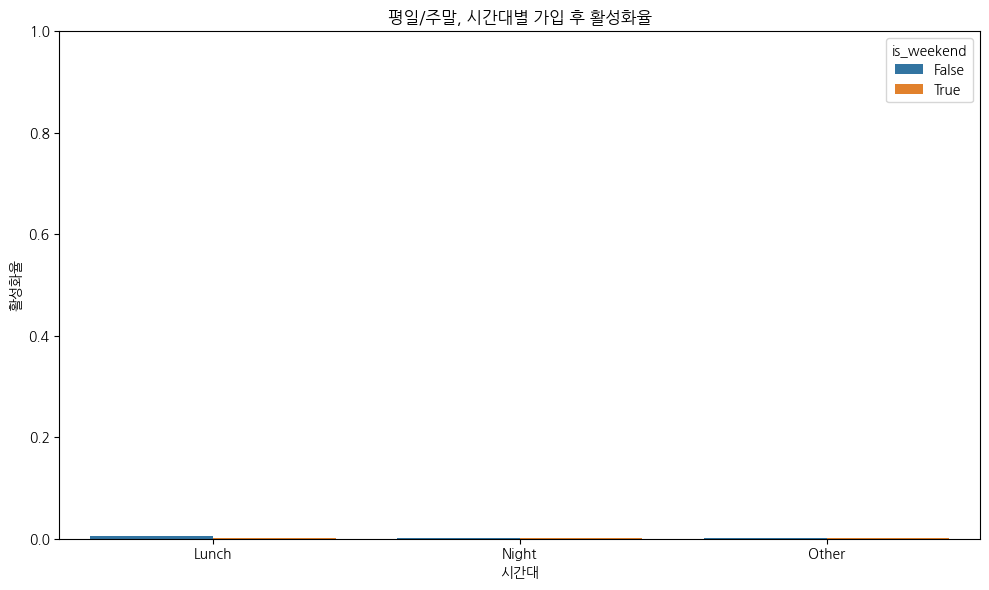

In [47]:
# ÌèâÏùº/Ï£ºÎßê, ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò Î∞è Ïù¥ÌõÑ ÌôúÏÑ±ÌôîÏú®(Ïòà: Ï≤´ ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏ Î∞úÏÉù ÎπÑÏú®) ÎπÑÍµê

# 1. Í∞ÄÏûÖÏûê Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏöîÏùº/ÏãúÍ∞ÑÎåÄ Ïª¨Îüº ÏÉùÏÑ±
accounts_user['weekday'] = accounts_user['created_at'].dt.day_name()
accounts_user['hour'] = accounts_user['created_at'].dt.hour

# ÌèâÏùº/Ï£ºÎßê Íµ¨Î∂Ñ
accounts_user['is_weekend'] = accounts_user['weekday'].isin(['Saturday', 'Sunday'])

# ÏãúÍ∞ÑÎåÄ Íµ¨Î∂Ñ (Ïòà: Î∞§(21~6), Ï†êÏã¨(11~14), Í∏∞ÌÉÄ)
def time_slot(hour):
    if 21 <= hour or hour < 6:
        return 'Night'
    elif 11 <= hour < 15:
        return 'Lunch'
    else:
        return 'Other'
accounts_user['time_slot'] = accounts_user['hour'].apply(time_slot)

# 2. Í∞ÄÏûÖÏûêÎ≥Ñ Ï≤´ ÌôúÏÑ±Ìôî(Activation) Ïù¥Î≤§Ìä∏ Î∞úÏÉù Ïó¨Î∂Ä ÏßëÍ≥Ñ
activation_keys = ['view_lab_tap', 'click_bottom_navigation_questions', 'click_bottom_navigation_timeline'
                   ,'view_timeline_tap', 'click_bottom_navigation_profile', 'click_bottom_navigation_lab'
                   , 'skip_question', 'click_question_start', 'view_profile_tap','click_question_ask']

# Í∞ÄÏûÖÏûê user_idÎ≥ÑÎ°ú Ï≤´ ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏ Î∞úÏÉù Ïó¨Î∂Ä
activation_df = signup_users_all_events[signup_users_all_events['event_key'].isin(activation_keys)]
activated_users = activation_df['user_id'].unique()
accounts_user['activated'] = accounts_user['id'].astype(str).isin(activated_users)

# 3. ÌèâÏùº/Ï£ºÎßê, ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò Î∞è ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
summary = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated', 'sum'))
    .reset_index()
)
summary['activation_rate'] = summary['activated'] / summary['signups']

print(summary)

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary,
    x='time_slot',
    y='activation_rate',
    hue='is_weekend'
)
plt.title('ÌèâÏùº/Ï£ºÎßê, ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞ÄÏûÖ ÌõÑ ÌôúÏÑ±ÌôîÏú®')
plt.ylabel('ÌôúÏÑ±ÌôîÏú®')
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏(activation_keys)Ïóê Ìè¨Ìï®Îêú Ïù¥Î≤§Ìä∏Í∞Ä ÎÑàÎ¨¥ Ï†úÌïúÏ†ÅÏù¥Í±∞ÎÇò, Ïã§Ï†úÎ°ú Í∞ÄÏûÖ ÏßÅÌõÑ Î∞úÏÉùÌïòÎäî Ïù¥Î≤§Ìä∏ÏôÄ ÎßûÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§. ÎòêÎäî 'activated' Ï°∞Í±¥Ïù¥ ÎÑàÎ¨¥ ÏóÑÍ≤©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [48]:
# 1. Í∞ÄÏûÖ ÏãúÍ∞Å Ï∂îÏ∂ú
signup_time = accounts_user[['id', 'created_at']].copy()
signup_time['created_at'] = pd.to_datetime(signup_time['created_at'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at': 'signup_time'})

# 2. Ïù¥Î≤§Ìä∏ ÌÖåÏù¥Î∏îÍ≥º Í∞ÄÏûÖ ÏãúÍ∞Å Ï°∞Ïù∏
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. Í∞ÄÏûÖ ÌõÑ 5Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ÎßÅ
events['within_5min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=5))
)

# 4. 5Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú
activated_users = events.loc[events['within_5min'], 'user_id'].drop_duplicates()

# 5. ÌôúÏÑ±Ìôî Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
accounts_user['activated_5min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. Í∑∏Î£πÎ≥Ñ ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
summary_5min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_5min', 'sum'))
    .reset_index()
)
summary_5min['activation_rate'] = summary_5min['activated'] / summary_5min['signups']

print(summary_5min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch     5463          0         0.000000
1       False     Night   210526          2         0.000010
2       False     Other   252269          8         0.000032
3        True     Lunch     5144          1         0.000194
4        True     Night    95251          1         0.000010
5        True     Other   108432          0         0.000000


In [49]:
# 1. Í∞ÄÏûÖ ÏãúÍ∞Å Ï∂îÏ∂ú
signup_time = accounts_user[['id', 'created_at']].copy()
signup_time['created_at'] = pd.to_datetime(signup_time['created_at'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at': 'signup_time'})

# 2. Ïù¥Î≤§Ìä∏ ÌÖåÏù¥Î∏îÍ≥º Í∞ÄÏûÖ ÏãúÍ∞Å Ï°∞Ïù∏
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. Í∞ÄÏûÖ ÌõÑ 10Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ÎßÅ
events['within_10min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=10))
)

# 4. 10Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú
activated_users = events.loc[events['within_10min'], 'user_id'].drop_duplicates()

# 5. ÌôúÏÑ±Ìôî Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
accounts_user['activated_10min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. Í∑∏Î£πÎ≥Ñ ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
summary_10min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_10min', 'sum'))
    .reset_index()
)
summary_10min['activation_rate'] = summary_10min['activated'] / summary_10min['signups']

print(summary_10min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch     5463          0         0.000000
1       False     Night   210526          8         0.000038
2       False     Other   252269         11         0.000044
3        True     Lunch     5144          1         0.000194
4        True     Night    95251          1         0.000010
5        True     Other   108432          0         0.000000


In [50]:
# 1. Í∞ÄÏûÖ ÏãúÍ∞Å Ï∂îÏ∂ú
signup_time = accounts_user[['id', 'created_at']].copy()
signup_time['created_at'] = pd.to_datetime(signup_time['created_at'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at': 'signup_time'})

# 2. Ïù¥Î≤§Ìä∏ ÌÖåÏù¥Î∏îÍ≥º Í∞ÄÏûÖ ÏãúÍ∞Å Ï°∞Ïù∏
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. Í∞ÄÏûÖ ÌõÑ 30Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ÎßÅ
events['within_30min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=30))
)

# 4. 30Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú
activated_users = events.loc[events['within_30min'], 'user_id'].drop_duplicates()

# 5. ÌôúÏÑ±Ìôî Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
accounts_user['activated_30min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. Í∑∏Î£πÎ≥Ñ ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
summary_30min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_30min', 'sum'))
    .reset_index()
)
summary_30min['activation_rate'] = summary_30min['activated'] / summary_30min['signups']

print(summary_30min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch     5463          0         0.000000
1       False     Night   210526         15         0.000071
2       False     Other   252269         16         0.000063
3        True     Lunch     5144          1         0.000194
4        True     Night    95251          2         0.000021
5        True     Other   108432          3         0.000028


In [51]:
# 1. Í∞ÄÏûÖ ÏãúÍ∞Å Ï∂îÏ∂ú
signup_time = accounts_user[['id', 'created_at']].copy()
signup_time['created_at'] = pd.to_datetime(signup_time['created_at'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at': 'signup_time'})

# 2. Ïù¥Î≤§Ìä∏ ÌÖåÏù¥Î∏îÍ≥º Í∞ÄÏûÖ ÏãúÍ∞Å Ï°∞Ïù∏
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. Í∞ÄÏûÖ ÌõÑ 1ÏãúÍ∞Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ÎßÅ
events['within_1hour'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(hours=1))
)

# 4. 1ÏãúÍ∞Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú
activated_users = events.loc[events['within_1hour'], 'user_id'].drop_duplicates()

# 5. ÌôúÏÑ±Ìôî Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
accounts_user['activated_1hour'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. Í∑∏Î£πÎ≥Ñ ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
summary_1hour = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_1hour', 'sum'))
    .reset_index()
)
summary_1hour['activation_rate'] = summary_1hour['activated'] / summary_1hour['signups']

print(summary_1hour)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch     5463          0         0.000000
1       False     Night   210526         19         0.000090
2       False     Other   252269         29         0.000115
3        True     Lunch     5144          1         0.000194
4        True     Night    95251          4         0.000042
5        True     Other   108432          8         0.000074


In [41]:
events_copy = events.copy()
accounts_copy = accounts_user.copy()

In [42]:
def time_event_activation_summary(time_unit: str, amount: int):
    # time_unit: 'minutes' ÎòêÎäî 'hours'
    delta = pd.Timedelta(**{time_unit: amount})  # ÎèôÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨
    

    # 3. Í∞ÄÏûÖ ÌõÑ ÏßÄÏ†ï ÏãúÍ∞Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ÎßÅ
    events_copy['within_time'] = (
        (events_copy['event_datetime'] > events_copy['signup_time']) &
        (events_copy['event_datetime'] <= events_copy['signup_time'] + delta)
    )
    
    # 4. Ìï¥Îãπ ÏãúÍ∞Ñ ÎÇ¥ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú
    activated_users = events_copy.loc[events_copy['within_time'], 'user_id'].drop_duplicates()

    # 5. ÌôúÏÑ±Ìôî Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
    accounts_copy['activated_time'] = accounts_copy['id'].astype(str).isin(activated_users)

    # 6. Í∑∏Î£πÎ≥Ñ ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
    summary_time = (
        accounts_copy
        .groupby(['is_weekend', 'time_slot'])
        .agg(signups=('id', 'count'), activated=('activated_time', 'sum'))
        .reset_index()
    )
    summary_time['activation_rate'] = summary_time['activated'] / summary_time['signups']
    
    print(f"== Í∞ÄÏûÖ ÌõÑ {amount} {time_unit} ÎÇ¥ ÌôúÏÑ±Ìôî ==")
    print(summary_time)
    print("="*60)

In [43]:
time_event_activation_summary('minutes', 5)
time_event_activation_summary('minutes', 10)
time_event_activation_summary('minutes', 30)
time_event_activation_summary('hours', 1)

== Í∞ÄÏûÖ ÌõÑ 5 minutes ÎÇ¥ ÌôúÏÑ±Ìôî ==
   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        104         0.001928
1       False     Night   178965        239         0.001335
2       False     Other   211760        276         0.001303
3        True     Lunch    37907         30         0.000791
4        True     Night    99098         76         0.000767
5        True     Other    95425         83         0.000870
== Í∞ÄÏûÖ ÌõÑ 10 minutes ÎÇ¥ ÌôúÏÑ±Ìôî ==
   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105         0.001947
1       False     Night   178965        240         0.001341
2       False     Other   211760        278         0.001313
3        True     Lunch    37907         30         0.000791
4        True     Night    99098         76         0.000767
5        True     Other    95425         83         0.000870
== Í∞ÄÏûÖ ÌõÑ 30 minutes ÎÇ¥ ÌôúÏÑ±Ìôî ==
   is_weekend time_sl

Í∞ÄÏûÖ ÌõÑ 5~60Î∂ÑÍπåÏßÄÏùò Î∞òÏùëÏùÑ Î∂ÑÏÑùÌïú Í≤∞Í≥º, ÎåÄÎ∂ÄÎ∂ÑÏùò Ïú†Ï†ÄÎäî Í∞ÄÏûÖ Ïù¥ÌõÑ ÏïÑÎ¨¥ Ïù¥Î≤§Ìä∏ÎèÑ Î∞úÏÉùÏãúÌÇ§ÏßÄ ÏïäÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.       
ÏãúÍ∞Ñ Í∏∞Ï§ÄÏùÑ 5Î∂Ñ ‚Üí 1ÏãúÍ∞ÑÏúºÎ°ú ÎÑìÌòÄÎèÑ ÌôúÏÑ±ÌôîÏú® Ï¶ùÍ∞ÄÎäî 0.001%p ÏàòÏ§ÄÏóê Î∂àÍ≥ºÌñàÏäµÎãàÎã§.

ÌäπÌûà, ÌèâÏùºÏóê ÎπÑÌï¥ Ï£ºÎßê Ïú†Ï†ÄÏùò ÌôúÏÑ±ÌôîÏú®Ïù¥ Îçî ÎÇÆÏïÑ, Ïú†ÏûÖ ÌíàÏßà ÎòêÎäî Ï¥àÍ∏∞ Ïò®Î≥¥Îî© Íµ¨Ï°∞ Í∞úÏÑ†Ïù¥ ÌïÑÏöîÌï¥ Î≥¥ÏûÖÎãàÎã§.       
Ïù¥Îäî Îã®ÏàúÌïú ÎåÄÍ∏∞ ÏãúÍ∞ÑÏùò Î¨∏Ï†úÎùºÍ∏∞Î≥¥Îã§Îäî, Í∑ºÎ≥∏Ï†ÅÏúºÎ°ú 'Í∞ÄÏûÖÎßå ÌïòÍ≥† Ïù¥ÌÉàÌïòÎäî Ïú†Ï†Ä' ÎπÑÏ§ëÏù¥ ÎÜíÏùÄ Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎê©ÎãàÎã§.

In [44]:
# 1. Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïù¥Î≤§Ìä∏Î•º Ï†ïÏùò (Ïòà: 'view_lab_tap' ÎòêÎäî 'click_bottom_navigation_lab' Îì±)
lab_tab_events = ['view_lab_tap', 'click_bottom_navigation_lab']

# 2. ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£åÌïú Ïú†Ï†Ä(user_id) Ï§ë Ïã§ÌóòÏã§ ÌÉ≠Ïóê ÌïúÎ≤àÏù¥ÎùºÎèÑ Îì§Ïñ¥Í∞Ñ Ïú†Ï†Ä Ï∂îÏ∂ú
lab_users = signup_users_all_events[signup_users_all_events['event_key'].isin(lab_tab_events)]['user_id'].unique()

# 3. Ï†ÑÏ≤¥ ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å Ïú†Ï†Ä Ïàò
total_signup_users = accounts_user['id'].astype(str).nunique()

# 4. Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†Ä Ïàò
lab_users_count = len(lab_users)

# 5. ÎπÑÏú® Í≥ÑÏÇ∞
lab_user_ratio = lab_users_count / total_signup_users * 100
print(f"ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å Ïú†Ï†Ä Ï§ë Ïã§ÌóòÏã§ ÌÉ≠Ïóê ÌïúÎ≤àÏù¥ÎùºÎèÑ Îì§Ïñ¥Í∞Ñ Ïú†Ï†Ä ÎπÑÏú®: {lab_user_ratio:.2f}% ({lab_users_count}/{total_signup_users})")

# 6. Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê Ï∂îÏ∂ú
lab_users_signup_dates = accounts_user[accounts_user['id'].astype(str).isin(lab_users)][['id', 'created_at_plus_9']]
print("Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê(ÏÉÅÏúÑ 10Í∞ú):")
print(lab_users_signup_dates.head(10))

ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å Ïú†Ï†Ä Ï§ë Ïã§ÌóòÏã§ ÌÉ≠Ïóê ÌïúÎ≤àÏù¥ÎùºÎèÑ Îì§Ïñ¥Í∞Ñ Ïú†Ï†Ä ÎπÑÏú®: 0.13% (903/677085)
Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê(ÏÉÅÏúÑ 10Í∞ú):
             id          created_at_plus_9
72498    923658 2023-05-06 23:58:56.451591
113297   967617 2023-05-07 21:59:18.841842
149013  1006061 2023-05-08 20:39:06.627464
326836  1199005 2023-05-13 14:34:29.760474
342954  1216565 2023-05-13 21:00:16.936982
387777  1265729 2023-05-14 22:43:19.358770
400739  1279934 2023-05-15 15:16:11.978139
441807  1324867 2023-05-16 21:27:32.600137
502317  1391728 2023-05-20 00:51:35.212829
631289  1534869 2023-05-28 16:56:12.336732


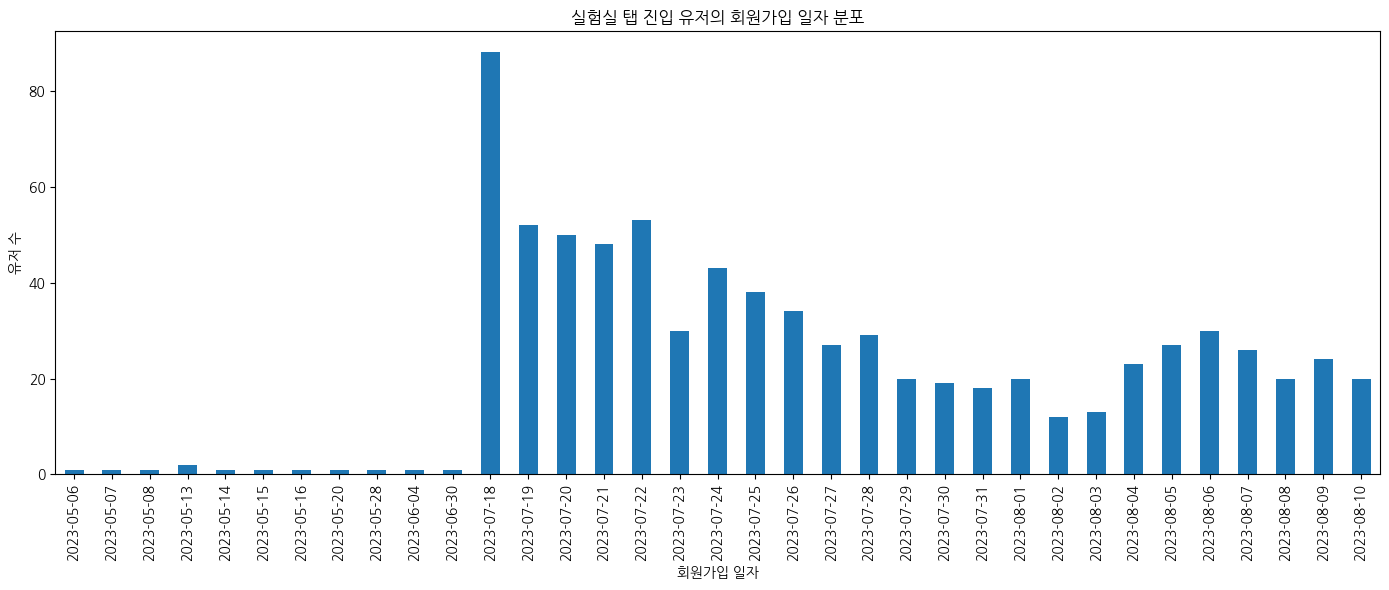

Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: 1528.93Î∂Ñ
Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: 1.34Î∂Ñ


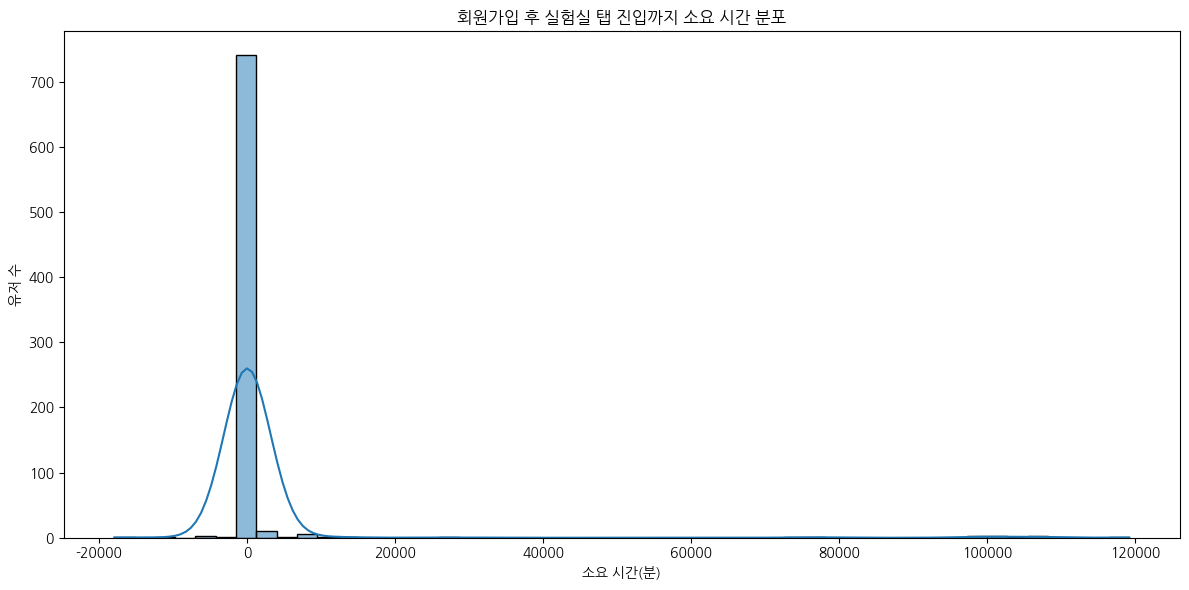

In [45]:
# Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
lab_users_signup_dates['created_at_plus_9'].dt.date.value_counts().sort_index().plot(kind='bar')
plt.title('Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê Î∂ÑÌè¨')
plt.xlabel('ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.tight_layout()
plt.show()

# Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ(Î∂Ñ) Í≥ÑÏÇ∞
# 1. Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
lab_events = signup_users_all_events[signup_users_all_events['user_id'].isin(lab_users) &
                                    signup_users_all_events['event_key'].isin(lab_tab_events)].copy()

# 2. ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê Ï†ïÎ≥¥ merge
lab_events = lab_events.merge(
    lab_users_signup_dates.rename(columns={'id': 'user_id'}),
    on='user_id',
    how='left'
)

# 3. ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ(Î∂Ñ) Í≥ÑÏÇ∞ (ÏµúÏ¥à ÏßÑÏûÖÎßå)
lab_events['signup_to_lab_min'] = (lab_events['event_datetime'] - lab_events['created_at_plus_9']).dt.total_seconds() / 60
first_lab_events = lab_events.sort_values(['user_id', 'event_datetime']).groupby('user_id').first()

# 4. ÌèâÍ∑†, Ï§ëÏïôÍ∞í Ï∂úÎ†•
mean_time = first_lab_events['signup_to_lab_min'].mean()
median_time = first_lab_events['signup_to_lab_min'].median()
print(f"Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: {mean_time:.2f}Î∂Ñ")
print(f"Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: {median_time:.2f}Î∂Ñ")

# 5. Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.histplot(first_lab_events['signup_to_lab_min'], bins=50, kde=True)
plt.title('ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨')
plt.xlabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.tight_layout()
plt.show()

In [46]:
# 1. Ïã§ÌóòÏã§ Í¥ÄÎ†® Ïù¥Î≤§Ìä∏Í∞Ä 7Ïõî 18Ïùº Ïù¥Ï†ÑÏóê ÏûàÏóàÎäîÏßÄ ÌôïÏù∏
lab_tab_events = ['view_lab_tap', 'click_bottom_navigation_lab']
lab_events_before_july18 = signup_users_events[ 
    (signup_users_events['event_key'].isin(lab_tab_events)) &
    (signup_users_events['event_datetime'] < pd.Timestamp('2023-07-18'))
]
print(f"7Ïõî 18Ïùº Ïù¥Ï†Ñ Ïã§ÌóòÏã§ Í¥ÄÎ†® Ïù¥Î≤§Ìä∏ Ïàò: {len(lab_events_before_july18)}")
if not lab_events_before_july18.empty:
    display(lab_events_before_july18[['event_datetime', 'event_key', 'user_id']].head())

7Ïõî 18Ïùº Ïù¥Ï†Ñ Ïã§ÌóòÏã§ Í¥ÄÎ†® Ïù¥Î≤§Ìä∏ Ïàò: 0


In [47]:
# signup_users_events Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏ ÌôïÏù∏
event_counts = signup_users_events['event_key'].value_counts()
print("Í∞ÄÏû• ÎßéÏù¥ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏ Top 10:")
print(event_counts.head(10))

Í∞ÄÏû• ÎßéÏù¥ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏ Top 10:
event_key
view_lab_tap                         21946
view_timeline_tap                    21016
click_question_open                  19641
launch_app                           14839
$session_start                       13603
click_bottom_navigation_questions    13243
skip_question                        13161
$session_end                         12075
click_bottom_navigation_profile      11866
click_bottom_navigation_timeline      8273
Name: count, dtype: int64


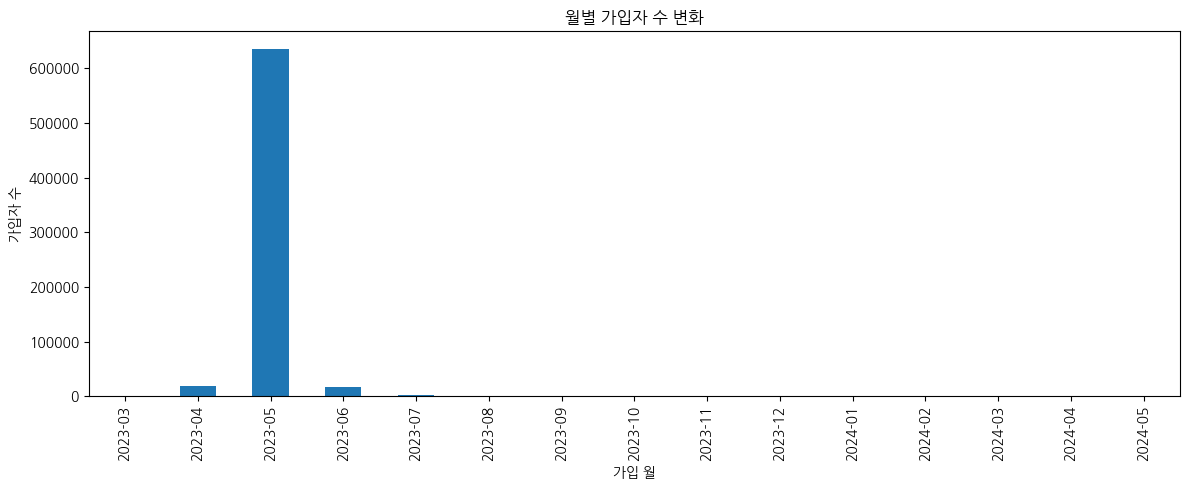

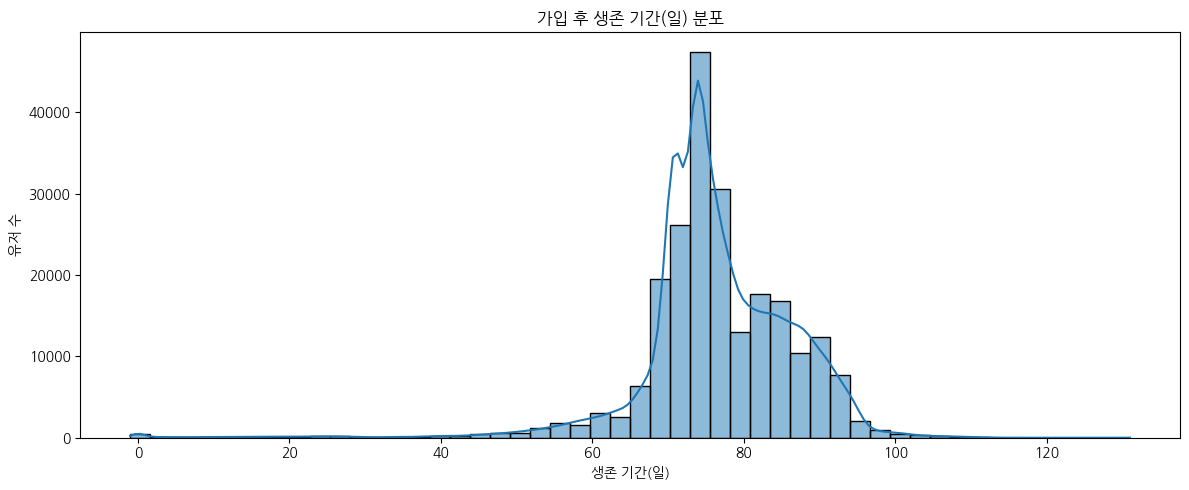

ÏÉùÏ°¥ Í∏∞Í∞Ñ ÌèâÍ∑†: 76.40Ïùº
ÏÉùÏ°¥ Í∏∞Í∞Ñ Ï§ëÍ∞ÑÍ∞í: 75.00Ïùº
30Ïùº Ïù¥ÏÉÅ ÏûîÏ°¥ Ïú†Ï†Ä Ïàò: 125175


In [55]:
# Í∞ÄÏûÖÏûê Ïàò Î≥ÄÌôî(5~6Ïõî Í∏âÏ¶ù) Î∞è Í∞ÄÏûÖ ÌõÑ ÏÉùÏ°¥ Í∏∞Í∞Ñ, Ïû•Í∏∞ ÏûîÏ°¥ Ïú†Ï†Ä ÏΩîÌò∏Ìä∏ Ï†ïÏùò

# accounts_user: vote Îç∞Ïù¥ÌÑ∞(Í∞ÄÏûÖÏûê Ï†ïÎ≥¥)
# final_hackle_df: ÌñâÎèô Î°úÍ∑∏ Îç∞Ïù¥ÌÑ∞

# 1. Í∞ÄÏûÖÏûê Ïàò Î≥ÄÌôî (ÏõîÎ≥Ñ)
accounts_user['signup_month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_signup_counts = accounts_user.groupby('signup_month').size()
plt.figure(figsize=(12, 5))
monthly_signup_counts.plot(kind='bar')
plt.title('ÏõîÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò Î≥ÄÌôî')
plt.xlabel('Í∞ÄÏûÖ Ïõî')
plt.ylabel('Í∞ÄÏûÖÏûê Ïàò')
plt.tight_layout()
plt.show()

# 2. Í∞ÄÏûÖ ÌõÑ ÏÉùÏ°¥ Í∏∞Í∞Ñ Í≥ÑÏÇ∞ (ÏµúÏ¢Ö Ïù¥Î≤§Ìä∏ ÏãúÍ∞Å - Í∞ÄÏûÖ ÏãúÍ∞Å)
user_last_event = final_hackle_df.groupby('user_id')['event_datetime'].max()
accounts_user['user_id'] = accounts_user['id'].astype(str)
accounts_user['last_event_time'] = accounts_user['user_id'].map(user_last_event)
accounts_user['survival_days'] = (accounts_user['last_event_time'] - accounts_user['created_at_plus_9']).dt.days

# 3. ÏÉùÏ°¥ Í∏∞Í∞ÑÎ≥Ñ Ïú†Ï†ÄÏùò Ïàò ÏãúÍ∞ÅÌôî Î∞è ÌÜµÍ≥ÑÏπò Ï∂úÎ†•
plt.figure(figsize=(12, 5))
sns.histplot(accounts_user['survival_days'].dropna(), bins=50, kde=True)
plt.title('Í∞ÄÏûÖ ÌõÑ ÏÉùÏ°¥ Í∏∞Í∞Ñ(Ïùº) Î∂ÑÌè¨')
plt.xlabel('ÏÉùÏ°¥ Í∏∞Í∞Ñ(Ïùº)')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.tight_layout()
plt.show()

# ÏÉùÏ°¥ Í∏∞Í∞ÑÏùò ÌèâÍ∑†, Ï§ëÍ∞ÑÍ∞í Í≥ÑÏÇ∞
mean_survival = accounts_user['survival_days'].mean()
median_survival = accounts_user['survival_days'].median()
print(f"ÏÉùÏ°¥ Í∏∞Í∞Ñ ÌèâÍ∑†: {mean_survival:.2f}Ïùº")
print(f"ÏÉùÏ°¥ Í∏∞Í∞Ñ Ï§ëÍ∞ÑÍ∞í: {median_survival:.2f}Ïùº")

# 4. Ïû•Í∏∞ ÏûîÏ°¥ Ïú†Ï†Ä(Ïòà: Í∞ÄÏûÖ ÌõÑ 30Ïùº Ïù¥ÏÉÅ ÌôúÎèô) Ï†ïÏùò
accounts_user['is_retained_median_day'] = accounts_user['survival_days'] >= median_survival
retained_users = accounts_user.loc[accounts_user['is_retained_median_day'], 'user_id'].tolist()
print(f"30Ïùº Ïù¥ÏÉÅ ÏûîÏ°¥ Ïú†Ï†Ä Ïàò: {len(retained_users)}")

In [53]:
# ÏûîÏ°¥ Ïú†Ï†ÄÏùò ÌñâÎèô Ìå®ÌÑ¥ Î∂ÑÏÑù (final_hackle Îç∞Ïù¥ÌÑ∞)
retained_events = final_hackle_df[final_hackle_df['user_id'].isin(retained_users)].copy()

# ÏûîÏ°¥ Ïú†Ï†ÄÏùò Ï£ºÏöî Ïù¥Î≤§Ìä∏ ÎπàÎèÑ
top_events = retained_events['event_key'].value_counts().head(10)
print("ÏûîÏ°¥ Ïú†Ï†Ä Ï£ºÏöî Ïù¥Î≤§Ìä∏ Top 10:")
print(top_events)

# # ÏûîÏ°¥ Ïú†Ï†ÄÎ≥Ñ Ï≤´ 10Í∞ú Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§
# retained_event_sequences = (
#     retained_events.sort_values(['user_id', 'event_datetime'])
#     .groupby('user_id')['event_key']
#     .apply(lambda x: list(x.head(10)))
# )
# print("ÏûîÏ°¥ Ïú†Ï†Ä Ï≤´ 10Í∞ú Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ ÏòàÏãú:")
# print(retained_event_sequences.head())

ÏûîÏ°¥ Ïú†Ï†Ä Ï£ºÏöî Ïù¥Î≤§Ìä∏ Top 10:
event_key
view_lab_tap                         735569
view_timeline_tap                    715591
launch_app                           575388
$session_start                       573226
click_question_open                  463651
click_bottom_navigation_questions    414263
$session_end                         377129
click_bottom_navigation_profile      372031
click_bottom_navigation_timeline     308316
skip_question                        288797
Name: count, dtype: int64


In [50]:
question_key = []
for key in list(final_hackle_df.event_key.unique()):
    if "question" in key:
        question_key.append(key)
question_key

['click_question_open',
 'click_bottom_navigation_questions',
 'view_questions_tap',
 'click_question_share',
 'complete_question',
 'click_question_start',
 'skip_question',
 'click_question_ask']

In [51]:
question_key = [event_name for event_name in list(final_hackle_df.event_key.unique()) if "question" in event_name]

In [66]:
# Ïú†Ï†ÄÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê, vote Îç∞Ïù¥ÌÑ∞ ÎÇ¥ ÎßàÏßÄÎßâ ÎÇ†Ïßú, hackle event ÎÇ¥ ÎßàÏßÄÎßâ ÎÇ†Ïßú, Í∑∏Î¶¨Í≥† Îçî Îä¶ÏùÄ Ï™Ω/ÏÜåÏä§/Ïù¥Î≤§Ìä∏ Ï†ïÎ≥¥ Íµ¨ÌïòÍ∏∞

# 1. ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê (accounts_user)
user_signup_dates = accounts_user[['user_id', 'created_at_plus_9']].copy()
user_signup_dates['created_at_plus_9'] = pd.to_datetime(user_signup_dates['created_at_plus_9'])

# 2. vote Îç∞Ïù¥ÌÑ∞ ÎÇ¥ ÎßàÏßÄÎßâ ÎÇ†Ïßú (user_question_df)
vote_last_event = (
    user_question_df.groupby('user_id')['created_at']
    .max()
    .rename('vote_last_event')
)

# 3. hackle event ÎÇ¥ ÎßàÏßÄÎßâ ÎÇ†Ïßú (final_hackle_df)
hackle_last_event = (
    final_hackle_df.groupby('user_id')[['event_datetime', 'event_key']]
    .apply(lambda df: df.loc[df['event_datetime'].idxmax(), ['event_datetime', 'event_key']])
)
hackle_last_event = hackle_last_event.rename({'event_datetime': 'hackle_last_event', 'event_key': 'hackle_last_event_key'}, axis=1)

# 4. Î≥ëÌï©
user_life_df = user_signup_dates.set_index('user_id').join(vote_last_event).join(hackle_last_event)

# 5. Í∞ÄÏû• Îä¶ÏùÄ ÎÇ†Ïßú, ÏÜåÏä§, Ïù¥Î≤§Ìä∏ Ï†ïÎ≥¥
def get_last_info(row):
    vote_time = row['vote_last_event']
    hackle_time = row['hackle_last_event']
    if pd.isna(vote_time) and pd.isna(hackle_time):
        return pd.Series([pd.NaT, None, None])
    if pd.isna(vote_time) or (not pd.isna(hackle_time) and hackle_time > vote_time):
        return pd.Series([hackle_time, 'hackle', row['hackle_last_event_key']])
    else:
        return pd.Series([vote_time, 'vote', None])

user_life_df[['last_event_time', 'last_event_source', 'last_event_key']] = user_life_df.apply(get_last_info, axis=1)

# Í≤∞Í≥º ÏòàÏãú Ï∂úÎ†•
display(user_life_df[['created_at_plus_9', 'vote_last_event', 'hackle_last_event', 'last_event_time', 'last_event_source', 'last_event_key']].head(10))

KeyboardInterrupt: 

5Ïõî, 7Ïõî ÏßàÎ¨∏ ÌôúÏÑ±ÌôîÏú®:
2023-05    0.007542
2023-07    0.209930
Freq: M, Name: user_id, dtype: float64


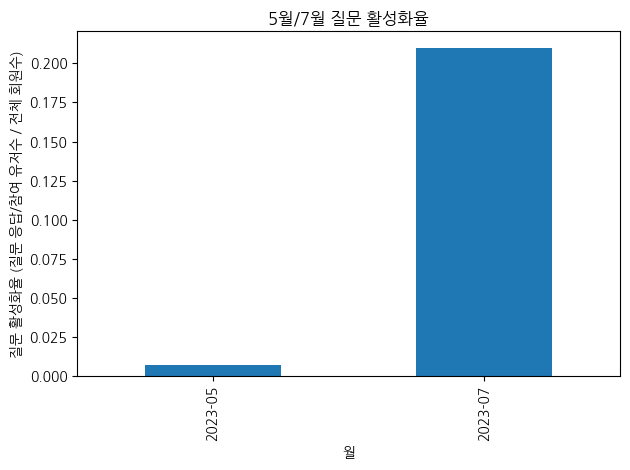

In [64]:
# vote ÎÇ¥ ÌÖåÏù¥Î∏î Ï§ë ÏßàÎ¨∏ ÏùëÎãµ/Ï∞∏Ïó¨ Í∏∞Î°ùÏù¥ ÏûàÎäî ÌÖåÏù¥Î∏îÏùÑ ÏÇ¨Ïö© (Ïòà: accounts_userquestionrecord)
# 1. ÏßàÎ¨∏Ïóê ÏùëÎãµ/Ï∞∏Ïó¨Ìïú Ïú†Ï†Ä Ï∂îÏ∂ú
user_question_df = df_dict['accounts_userquestionrecord']
user_question_df['user_id'] = user_question_df['user_id'].astype(str)

# 2. ÏõîÎ≥ÑÎ°ú ÏßàÎ¨∏Ïóê ÏùëÎãµ/Ï∞∏Ïó¨Ìïú Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ (Ï§ëÎ≥µ Ï†úÍ±∞)
user_question_df['answer_month'] = user_question_df['created_at'].dt.to_period('M')
monthly_active_users = user_question_df.groupby('answer_month')['user_id'].nunique()

# 3. ÏõîÎ≥Ñ Ï†ÑÏ≤¥ ÌöåÏõê Ïàò ÏßëÍ≥Ñ (accounts_user Í∏∞Ï§Ä)
accounts_user['signup_month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_total_users = accounts_user.groupby('signup_month')['user_id'].nunique()

# 4. ÏõîÎ≥Ñ ÏßàÎ¨∏ ÌôúÏÑ±ÌôîÏú® (ÏßàÎ¨∏ ÏùëÎãµ/Ï∞∏Ïó¨ Ïú†Ï†Ä Ïàò / Ï†ÑÏ≤¥ ÌöåÏõê Ïàò)
question_activation_rate = (monthly_active_users / monthly_total_users).fillna(0)

# 5. 5Ïõî, 7ÏõîÎßå Ï∂îÏ∂ú
activation_rate_5_7 = question_activation_rate.loc[['2023-05', '2023-07']]
print("5Ïõî, 7Ïõî ÏßàÎ¨∏ ÌôúÏÑ±ÌôîÏú®:")
print(activation_rate_5_7)

# 6. ÏãúÍ∞ÅÌôî
activation_rate_5_7.plot(kind='bar', title='5Ïõî/7Ïõî ÏßàÎ¨∏ ÌôúÏÑ±ÌôîÏú®')
plt.ylabel('ÏßàÎ¨∏ ÌôúÏÑ±ÌôîÏú® (ÏßàÎ¨∏ ÏùëÎãµ/Ï∞∏Ïó¨ Ïú†Ï†ÄÏàò / Ï†ÑÏ≤¥ ÌöåÏõêÏàò)')
plt.xlabel('Ïõî')
plt.tight_layout()
plt.show()

In [65]:
monthly_active_users

answer_month
2023-04     338
2023-05    4797
2023-06    1872
2023-07     389
2023-08     170
2023-09     178
2023-10      46
2023-11      22
2023-12      26
2024-01      19
2024-02       9
2024-03      13
2024-04       4
2024-05       6
Freq: M, Name: user_id, dtype: int64

5Ïõî, 7Ïõî Ìà¨ÌëúÏú®:
2023-05       0.000000
2023-07    1043.281166
Freq: M, dtype: float64


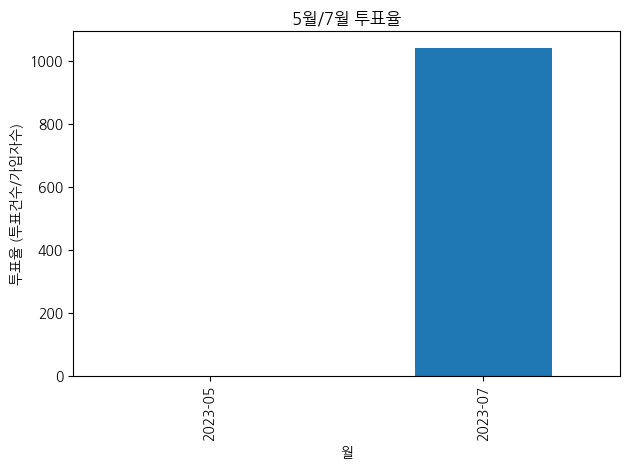

In [63]:
# 1. Ìà¨Ìëú Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú (event_keyÍ∞Ä Ïã§Ï†ú Ìà¨ÌëúÎ•º ÏùòÎØ∏ÌïòÎäî Í∞íÏúºÎ°ú Î≥ÄÍ≤Ω)
vote_events = final_hackle_df[final_hackle_df['event_key'].isin(question_key)].copy()

# 2. ÏõîÎ≥Ñ Ìà¨Ìëú Í±¥Ïàò ÏßëÍ≥Ñ
vote_events['vote_month'] = vote_events['event_datetime'].dt.to_period('M')
monthly_vote_counts = vote_events.groupby('vote_month').size()

# 3. ÏõîÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖÏûê Ïàò ÏßëÍ≥Ñ (accounts_user Í∏∞Ï§Ä)
accounts_user['signup_month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_signup_counts = accounts_user.groupby('signup_month').size()

# 4. ÏõîÎ≥Ñ Ìà¨ÌëúÏú® Í≥ÑÏÇ∞ (Ìà¨Ìëú Í±¥Ïàò / Í∞ÄÏûÖÏûê Ïàò)
vote_rate = (monthly_vote_counts / monthly_signup_counts).fillna(0)

# 5. 5Ïõî, 7ÏõîÎßå Ï∂îÏ∂ú
vote_rate_5_7 = vote_rate.loc[['2023-05', '2023-07']]
print("5Ïõî, 7Ïõî Ìà¨ÌëúÏú®:")
print(vote_rate_5_7)

# 6. ÏãúÍ∞ÅÌôî
vote_rate.loc[['2023-05', '2023-07']].plot(kind='bar', title='5Ïõî/7Ïõî Ìà¨ÌëúÏú®')
plt.ylabel('Ìà¨ÌëúÏú® (Ìà¨ÌëúÍ±¥Ïàò/Í∞ÄÏûÖÏûêÏàò)')
plt.xlabel('Ïõî')
plt.tight_layout()
plt.show()

In [ ]:
# Îëê Îç∞Ïù¥ÌÑ∞ Ïó∞Í≤∞(Ïú†Ï†Ä ID Í∏∞Ï§Ä)
# accounts_userÏôÄ final_hackle_df Î™®Îëê user_idÎ°ú Ï°∞Ïù∏ Í∞ÄÎä•
# Ï¥àÍ∏∞ ÌñâÎèô Ìå®ÌÑ¥ ‚Üí ÏûîÏ°¥Í≥ºÏùò Í¥ÄÍ≥Ñ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏòàÏãú
user_behavior = accounts_user[['user_id', 'created_at_plus_9', 'is_retained_30d']].merge(
    final_hackle_df, on='user_id', how='left'
)
print(user_behavior.head())

## launch_app -> view_signup ÏÇ¨Ïù¥ Î∞úÏÉùÌïòÎäî ÏùºÎì§Ïóê ÎåÄÌï¥ÏÑú
---

In [59]:
# Ïö∞ÏÑ† ÌöåÏõêÍ∞ÄÏûÖÏóê Î¨¥Í¥ÄÌïòÍ≤å(ÌöåÏõêÍ∞ÄÏûÖÏùÑ ÏôÑÎ£åÌïòÏòÄÎäîÍ∞ÄÏóê ÎåÄÌï¥ÏÑú Î¨¥Í¥ÄÌïòÍ≤å)
# "view_signup" Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî session_id Ï∂îÏ∂ú
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'session_id'].unique()

# Ìï¥Îãπ session_idÏùò Î™®Îì† Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# Í∞Å session_idÎ≥ÑÎ°ú "launch_app" Ïù¥Î≤§Ìä∏Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
has_launch_app = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "view_signup"Ïù¥ ÏûàÎäî session_id Ï§ë "launch_app"Ïù¥ ÏóÜÎäî session_id Í∞úÏàò
num_sessions_without_launch_app = (~has_launch_app).sum()
print(f'"view_signup" session Ï§ë "launch_app"Ïù¥ ÏóÜÎäî session Ïàò: {num_sessions_without_launch_app}')

# "view_signup" Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌïú ÏãúÏ†ê Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÏóàÎäîÏßÄ ÌôïÏù∏
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'view_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏûàÎäîÏßÄ
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_sessions_all_events.groupby('session_id').apply(launch_app_before_signup)
num_sessions_without_launch_app_before = (~launch_app_before).sum()
print(f'"view_signup" session Ï§ë "view_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏóÜÎäî session Ïàò: {num_sessions_without_launch_app_before}')
num_sessions_with_launch_app_before = (launch_app_before).sum()
print(f'"view_signup" session Ï§ë "view_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÎäî session Ïàò: {num_sessions_with_launch_app_before}')

"view_signup" session Ï§ë "launch_app"Ïù¥ ÏóÜÎäî session Ïàò: 11
"view_signup" session Ï§ë "view_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏóÜÎäî session Ïàò: 37
"view_signup" session Ï§ë "view_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÎäî session Ïàò: 6649


In [60]:
# launch_app ÏùÑ Í∞ÄÏßÑ session ÏïÑÏù¥ÎîîÏôÄ user_id Ïú†ÎãàÌÅ¨ Í∞í

print(f"launch_app Ïù¥Î≤§Ìä∏Î•º Í∞ÄÏßÑ Ïú†ÎãàÌÅ¨Ìïú session_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'launch_app', 'session_id'].nunique()}")
print(f"launch_app Ïù¥Î≤§Ìä∏Î•º Í∞ÄÏßÑ Ïú†ÎãàÌÅ¨Ìïú user_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'launch_app', 'user_id'].nunique()}")
print()
print(f"view_signup Ïù¥Î≤§Ìä∏Î•º Í∞ÄÏßÑ Ïú†ÎãàÌÅ¨Ìïú session_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'session_id'].nunique()}")
print(f"view_signup Ïù¥Î≤§Ìä∏Î•º Í∞ÄÏßÑ Ïú†ÎãàÌÅ¨Ìïú user_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'user_id'].nunique()}")

launch_app Ïù¥Î≤§Ìä∏Î•º Í∞ÄÏßÑ Ïú†ÎãàÌÅ¨Ìïú session_id : 242211
launch_app Ïù¥Î≤§Ìä∏Î•º Í∞ÄÏßÑ Ïú†ÎãàÌÅ¨Ìïú user_id : 239538

view_signup Ïù¥Î≤§Ìä∏Î•º Í∞ÄÏßÑ Ïú†ÎãàÌÅ¨Ìïú session_id : 6686
view_signup Ïù¥Î≤§Ìä∏Î•º Í∞ÄÏßÑ Ïú†ÎãàÌÅ¨Ìïú user_id : 6664
